In [2]:
import numpy as np
import matplotlib.pyplot as plt
from cycler import cycler
import seaborn as sns
import matplotlib.gridspec as gridspec
import matplotlib.image as mpimg
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from PIL import Image
import matplotlib.font_manager as fm

## Fig. 1

In [104]:


error_color='indianred'
logp_data=np.loadtxt("fig_data/fes/logPs_nucleosides")
hbonds_nitr_data=np.loadtxt("fig_data/contacts/nitrogens_nucleosides")
tot_hbonds_data=np.loadtxt("fig_data/contacts/tot_hbonds_memb_nucleosides")
vdw_data=np.loadtxt("fig_data/contacts/vdw_memb_nucleosides")
vdw_wat_diff_data=np.loadtxt("fig_data/contacts/diff_wat_vdw_nucleosides")
hydr_data=np.loadtxt("fig_data/hydr_fes/hydr_fes_nucleosides")
hydr_data=hydr_data
col_G=sns.color_palette("rocket", 4)[0]
col_A=sns.color_palette("rocket", 4)[1]
col_C=sns.color_palette("rocket", 4)[3]

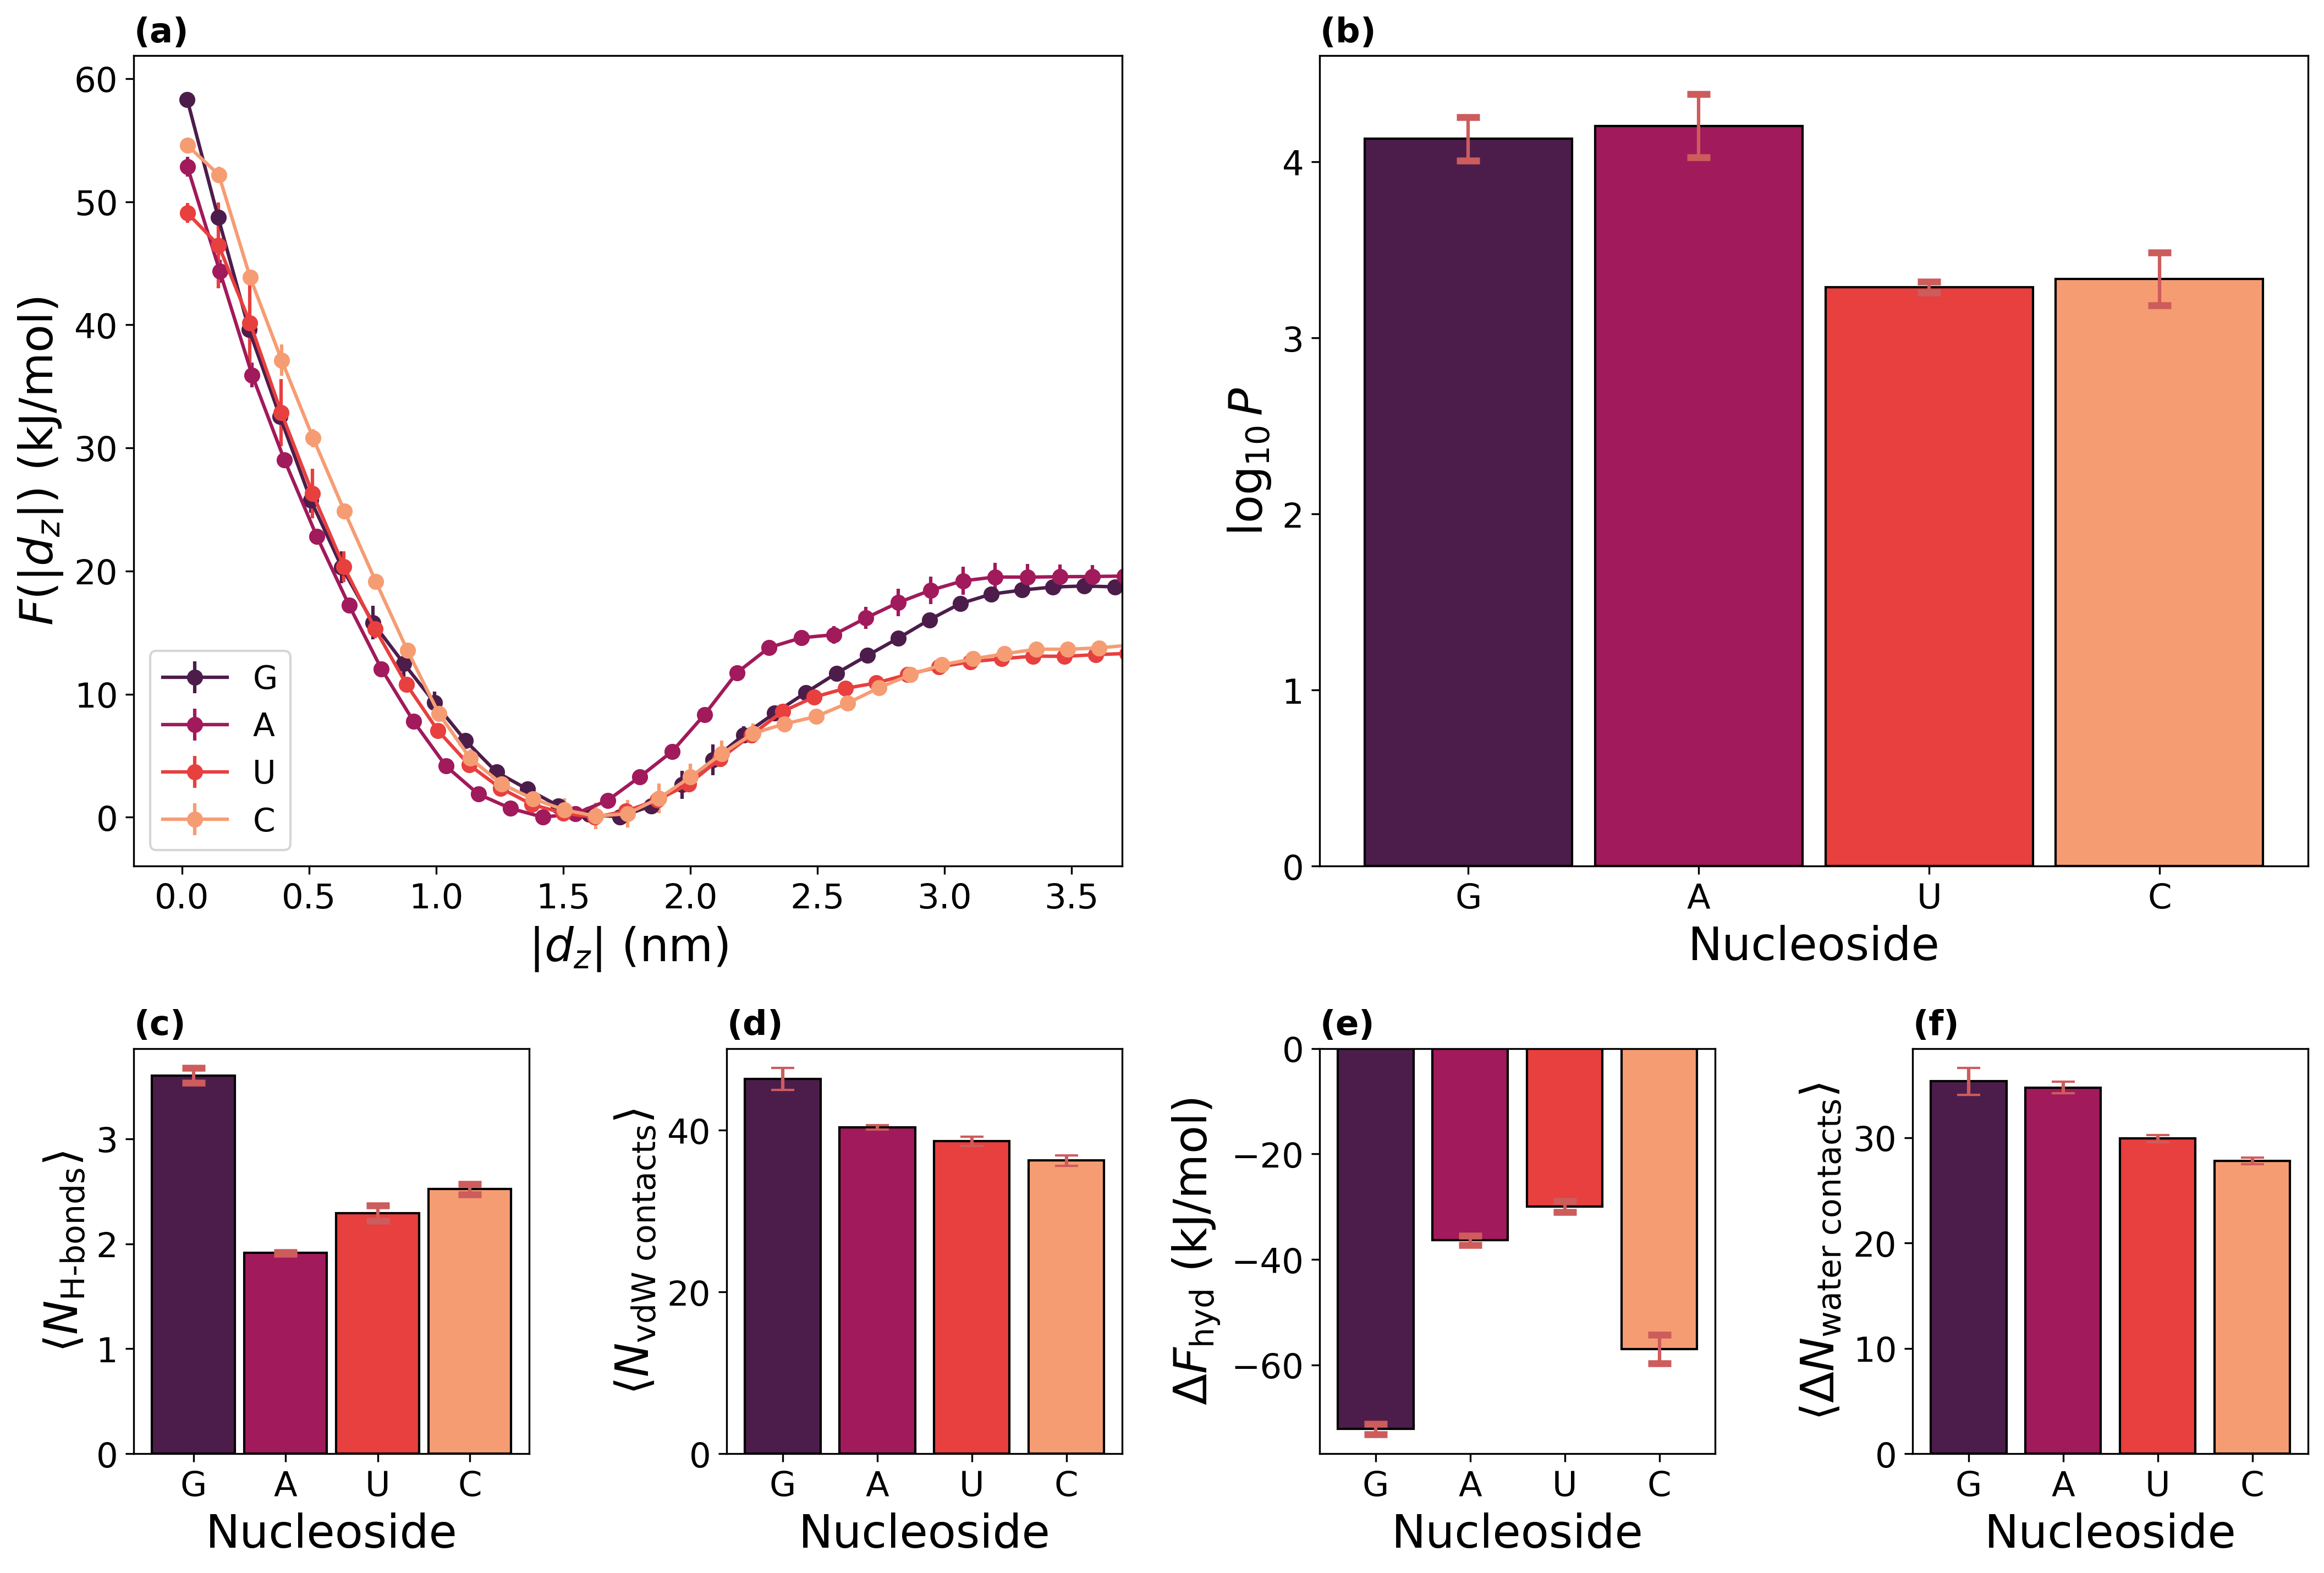

In [105]:

palette1 = sns.color_palette("rainbow", 12)
palette2 = sns.color_palette("rocket", 4)
palette2_int = sns.color_palette("rocket", 8)
palette3 = sns.color_palette("coolwarm", 4)
gs = gridspec.GridSpec(2, 4, width_ratios=[0.5, 0.5, 0.5,0.5], height_ratios=[0.6, 0.3])

# Define font size
font_size = 16

# Create the subplots
fig = plt.figure(figsize=(17, 11),dpi=300)
fig.subplots_adjust(wspace=0.5, hspace=0.3)
ax1 = plt.subplot(gs[0, :2])  # Top left plot spanning 2 columns
ax2 = plt.subplot(gs[0, 2:])   # Top right plot
ax3 = plt.subplot(gs[1, 0])   # Bottom left plot
ax4 = plt.subplot(gs[1, 1])   # Bottom middle plot
ax5 = plt.subplot(gs[1, 2])   # Bottom right plot
ax6 = plt.subplot(gs[1, 3])   # Bottom right plot
ax1.tick_params(axis='both', which='major', labelsize=15)
ax2.tick_params(axis='both', which='major', labelsize=15)
ax3.tick_params(axis='both', which='major', labelsize=15)
ax4.tick_params(axis='both', which='major', labelsize=15)
ax5.tick_params(axis='both', which='major', labelsize=15)
ax6.tick_params(axis='both', which='major', labelsize=15)
font_size=20
##1.Plotting FES.
nucls=["G","A","U","C"]
for i_nucl,nucl in enumerate(nucls):
    fes_data=np.loadtxt("fig_data/fes/fes_"+str(nucl))
    ax1.errorbar(fes_data[::3,0],fes_data[::3,1],fes_data[::3,2],marker='o',label=nucl,color=palette2[i_nucl])

ax1.set_xlabel("$|d_z|$ (nm)",size=font_size)
ax1.set_ylabel(r"$F(|d_z|$) (kJ/mol)",size=font_size)
ax1.set_title("$\mathbf{(a)}$",loc='left',fontsize=15)
ax1.set_xlim(right=3.7)
ax1.legend(fontsize=14,loc='lower left')
#2.Plot logPs
for i_nucl,nucl in enumerate(nucls):
    ax2.bar(nucl,logp_data[i_nucl,0],edgecolor='black',ecolor='red',width=0.9,color=palette2[i_nucl])
    ax2.errorbar(nucl,logp_data[i_nucl,0],yerr=logp_data[i_nucl,1],fmt='none',barsabove=True,capsize=5,capthick=3,c=error_color)
ax2.set_ylabel(r"$\log_{10}P$",size=font_size)
ax2.set_xlabel("Nucleoside",size=font_size)
ax2.set_title("$\mathbf{(b)}$",loc='left',fontsize=15)



#3. hbonds
palette2_int = sns.color_palette("rocket", 12)

#2.Plot logPs
for i_nucl,nucl in enumerate(nucls):
    ax3.bar(nucl,tot_hbonds_data[i_nucl,0],edgecolor='black',ecolor='red',width=0.9,color=palette2[i_nucl])
    ax3.errorbar(nucl,tot_hbonds_data[i_nucl,0],yerr=tot_hbonds_data[i_nucl,1],fmt='none',barsabove=True,capsize=5,capthick=3,c=error_color)

ax3.set_ylabel(r"$\langle N_{\text{H-bonds}}\rangle$",size=font_size)
ax3.set_xlabel("Nucleoside",size=font_size)
ax3.set_title("$\mathbf{(c)}$",loc='left',fontsize=15)
vdw_contacts=vdw_data[:,0]
err_vdw_contacts=vdw_data[:,1]

ax4.set_ylabel(r"$\langle N_{\text{vdW contacts}}\rangle$",fontsize=font_size)
ax4.set_xlabel("Nucleoside",fontsize=font_size)
for i_nucl, nucl in enumerate(nucls):
    ax4.bar(nucl,vdw_contacts[i_nucl],color=palette2[i_nucl],edgecolor='black')
ax4.set_title("$\mathbf{(d)}$",loc='left',fontsize=15)

ax4.errorbar(nucls,vdw_contacts,yerr=err_vdw_contacts,fmt='none',color=error_color,barsabove=True,capsize=5)
   

#5. Plot differences in water hydration
vdw_wat_diff_data
diff_wat=vdw_wat_diff_data[:,0]
err_diff_wat=vdw_wat_diff_data[:,1]
ax6.set_ylabel(r"$\langle \Delta N_{\text{water contacts}}\rangle$",fontsize=font_size)
ax6.set_xlabel("Nucleoside",fontsize=font_size)
for i_nucl, nucl in enumerate(nucls):
    ax6.bar(nucl,diff_wat[i_nucl],color=palette2[i_nucl],edgecolor='black')
ax6.set_title("$\mathbf{(f)}$",loc='left',fontsize=15)

ax6.errorbar(nucls,diff_wat,yerr=err_diff_wat,fmt='none',color=error_color,barsabove=True,capsize=5)
   




#6. Plot hydration free energy
for i_nucl,nucl in enumerate(nucls):
    ax5.bar(nucl,hydr_data[i_nucl,0],color=palette2[i_nucl],edgecolor='black')
    ax5.errorbar(nucl,hydr_data[i_nucl,0],yerr=hydr_data[i_nucl,1],color=error_color,fmt='none',barsabove=True,capsize=5,capthick=3)
ax5.set_xlabel("Nucleoside",fontsize=font_size)
ax5.set_ylabel(r"$\Delta F_{\text{hyd}}$ (kJ/mol)",fontsize=font_size)
ax5.set_title("$\mathbf{(e)}$",loc='left',fontsize=15)



plt.savefig('fig_data/nucleosides.pdf', transparent=True,bbox_inches='tight')
plt.show()

## Fig. 2

In [16]:
nucls=["G2","A2","U2","C2"]
logp_data=np.loadtxt("fig_data/fes/logPs_all")
hbonds_data=np.loadtxt("fig_data/contacts/avg_hbonds_all")
vdw_data=np.loadtxt("fig_data/contacts/vdw_memb_all")

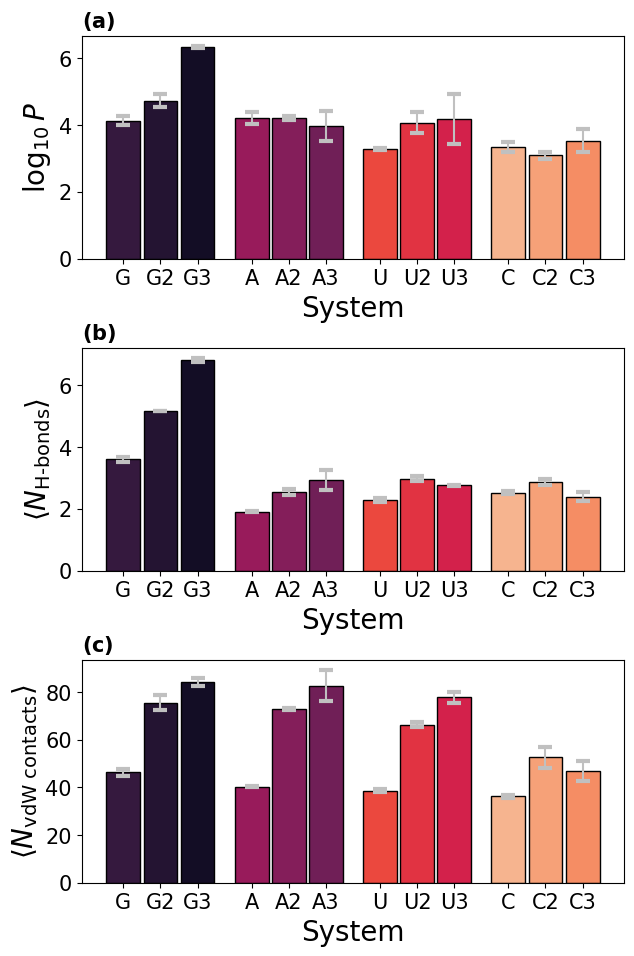

In [27]:
palette2_int = sns.color_palette("rocket", 20)
logks=logp_data[:,0]
err_logks=logp_data[:,1]
fig = plt.figure(figsize=(7, 11))
fig.subplots_adjust(wspace=0.4, hspace=0.4)
gs = gridspec.GridSpec(3, 1, width_ratios=[0.5], height_ratios=[0.5, 0.5,0.5])
ax1 = plt.subplot(gs[0, 0])   # Top right plot
ax2 = plt.subplot(gs[1, 0])   # Bottom left plot
ax3 = plt.subplot(gs[2, 0])   # Bottom middle plot
ax1.tick_params(axis='both', which='major', labelsize=15)
ax2.tick_params(axis='both', which='major', labelsize=15)
ax3.tick_params(axis='both', which='major', labelsize=15)
font_size=20
#Plotting al logPs
small_spacing=0.55
big_spacing=0.8
namelist=[]
last=0
namelist.append(0)
for i in range(1,12):
    if i%3!=0:
        namelist.append(last+small_spacing)
        last=last+small_spacing
    else:
        namelist.append(last+big_spacing)
        last=last+big_spacing

ax1.set_xticks(ticks=namelist,labels=['G','G2','G3','A','A2','A3','U','U2','U3','C','C2','C3'])
ax1.set_title("$\mathbf{(a)}$",loc='left',fontsize=15)

nucleosides=np.asarray([0,3,6,9]).astype(int)
dinucleotides=np.asarray([1,4,7,10]).astype(int)
trinucleotides=np.asarray([2,5,8,11]).astype(int)
namelist=np.asarray(namelist)
logks=np.asarray(logks)
lcol=len(palette2_int)
i0=0
i1=lcol//4
i2=lcol//2
i3=lcol*3//4
color_list=[i0+2,i0+1,i0,i1+2,i1+1,i1,i2+2,i2+1,i2,i3+2,i3+1,i3]
for i_nucl in nucleosides:
    
    ax1.bar(namelist[i_nucl],logks[i_nucl],edgecolor='black',ecolor='red',width=0.5,color=palette2_int[color_list[i_nucl]])
for i_nucl in dinucleotides:
    ax1.bar(namelist[i_nucl],logks[i_nucl],edgecolor='black',ecolor='red',width=0.5,color=palette2_int[color_list[i_nucl]])
for i_nucl in trinucleotides:
    ax1.bar(namelist[i_nucl],logks[i_nucl],edgecolor='black',ecolor='red',width=0.5,color=palette2_int[color_list[i_nucl]])
ax1.errorbar(namelist,logks,yerr=err_logks,fmt='none',barsabove=True,capsize=5,capthick=3,c='silver')
ax1.set_ylabel(r"$\log_{10}P$",size=font_size)
ax1.set_xlabel("System",size=font_size)


#2. Total hbonds


nucls=["G","G2","G3","A","A2","A3","U","U2","U3","C","C2","C3"]

logks=logp_data[:,0]
err_logks=logp_data[:,1]

small_spacing=0.55
big_spacing=0.8
namelist=[]
last=0
namelist.append(0)
for i in range(1,12):
    if i%3!=0:
        namelist.append(last+small_spacing)
        last=last+small_spacing
    else:
        namelist.append(last+big_spacing)
        last=last+big_spacing

ax2.set_xticks(ticks=namelist,labels=['G','G2','G3','A','A2','A3','U','U2','U3','C','C2','C3'])
ax2.set_title("$\mathbf{(b)}$",loc='left',fontsize=15)

nucleosides=np.asarray([0,3,6,9]).astype(int)
dinucleotides=np.asarray([1,4,7,10]).astype(int)
trinucleotides=np.asarray([2,5,8,11]).astype(int)
namelist=np.asarray(namelist)
logks=np.asarray(logks)
for i_nucl in nucleosides:
    
    ax2.bar(namelist[i_nucl],hbonds_data[i_nucl,0],edgecolor='black',ecolor='red',width=0.5,color=palette2_int[color_list[i_nucl]])
for i_nucl in dinucleotides:
    ax2.bar(namelist[i_nucl],hbonds_data[i_nucl,0],edgecolor='black',ecolor='red',width=0.5,color=palette2_int[color_list[i_nucl]])
for i_nucl in trinucleotides:
    ax2.bar(namelist[i_nucl],hbonds_data[i_nucl,0],edgecolor='black',ecolor='red',width=0.5,color=palette2_int[color_list[i_nucl]])
ax2.errorbar(namelist,hbonds_data[:,0],yerr=hbonds_data[:,1],fmt='none',barsabove=True,capsize=5,capthick=3,c='silver')
ax2.set_ylabel(r"$\langle N_{\text{H-bonds}}\rangle$",size=font_size)
ax2.set_xlabel("System",size=font_size)


#3. VdW interactions

nucls=["G","G2","G3","A","A2","A3","U","U2","U3","C","C2","C3"]
 
logks=logp_data[:,0]
err_logks=logp_data[:,1]

small_spacing=0.55
big_spacing=0.8
namelist=[]
last=0
namelist.append(0)
for i in range(1,12):
    if i%3!=0:
        namelist.append(last+small_spacing)
        last=last+small_spacing
    else:
        namelist.append(last+big_spacing)
        last=last+big_spacing

nucleosides=np.asarray([0,3,6,9]).astype(int)
dinucleotides=np.asarray([1,4,7,10]).astype(int)
trinucleotides=np.asarray([2,5,8,11]).astype(int)
namelist=np.asarray(namelist)
logks=np.asarray(logks)
for i_nucl in nucleosides:
    
    ax3.bar(namelist[i_nucl],vdw_data[i_nucl,0],edgecolor='black',ecolor='red',width=0.5,color=palette2_int[color_list[i_nucl]])
for i_nucl in dinucleotides:
    ax3.bar(namelist[i_nucl],vdw_data[i_nucl,0],edgecolor='black',ecolor='red',width=0.5,color=palette2_int[color_list[i_nucl]])
for i_nucl in trinucleotides:
    ax3.bar(namelist[i_nucl],vdw_data[i_nucl,0],edgecolor='black',ecolor='red',width=0.5,color=palette2_int[color_list[i_nucl]])
ax3.errorbar(namelist,vdw_data[:,0],yerr=vdw_data[:,1],fmt='none',barsabove=True,capsize=5,capthick=3,c='silver')
ax3.set_ylabel(r"$\langle N_{\text{vdW contacts}}\rangle$",size=font_size)
ax3.set_xlabel("System",size=font_size)
ax3.set_xticks(ticks=namelist,labels=['G','G2','G3','A','A2','A3','U','U2','U3','C','C2','C3'])
ax3.set_title("$\mathbf{(c)}$",loc='left',fontsize=15)

#4. hydration free energies

nucls=["G","G2","G3","A","A2","A3","U","U2","U3","C","C2","C3"]
 
logks=logp_data[:,0]
err_logks=logp_data[:,1]

small_spacing=0.55
big_spacing=0.8
namelist=[]
last=0
namelist.append(0)
for i in range(1,12):
    if i%3!=0:
        namelist.append(last+small_spacing)
        last=last+small_spacing
    else:
        namelist.append(last+big_spacing)
        last=last+big_spacing

nucleosides=np.asarray([0,3,6,9]).astype(int)
dinucleotides=np.asarray([1,4,7,10]).astype(int)
trinucleotides=np.asarray([2,5,8,11]).astype(int)
namelist=np.asarray(namelist)
logks=np.asarray(logks)




plt.savefig('fig_data/all_small.pdf', transparent=True,bbox_inches='tight')
plt.show()

## Figure 3

In [187]:
logp_strand=np.round(np.loadtxt("fig_data/fes/logPs_strand"),1)
logp_quad=np.round(np.loadtxt("fig_data/fes/logPs_quadruplex"),1)
res_cont_quad=np.loadtxt("fig_data/contacts/res_contacts_quadruplex.dat")
res_cont_strand=np.loadtxt("fig_data/contacts/res_contacts_strand.dat")
hbonds_data=np.loadtxt("fig_data/contacts/tot_hbonds_memb_19mer")
nGAs_HB=np.loadtxt("fig_data/contacts/nGAs_HB_19mer")
nGAs_vdw=np.loadtxt("fig_data/contacts/nGAs_vdw_19mer")
vdw_data=np.loadtxt("fig_data/contacts/vdws_19mer")

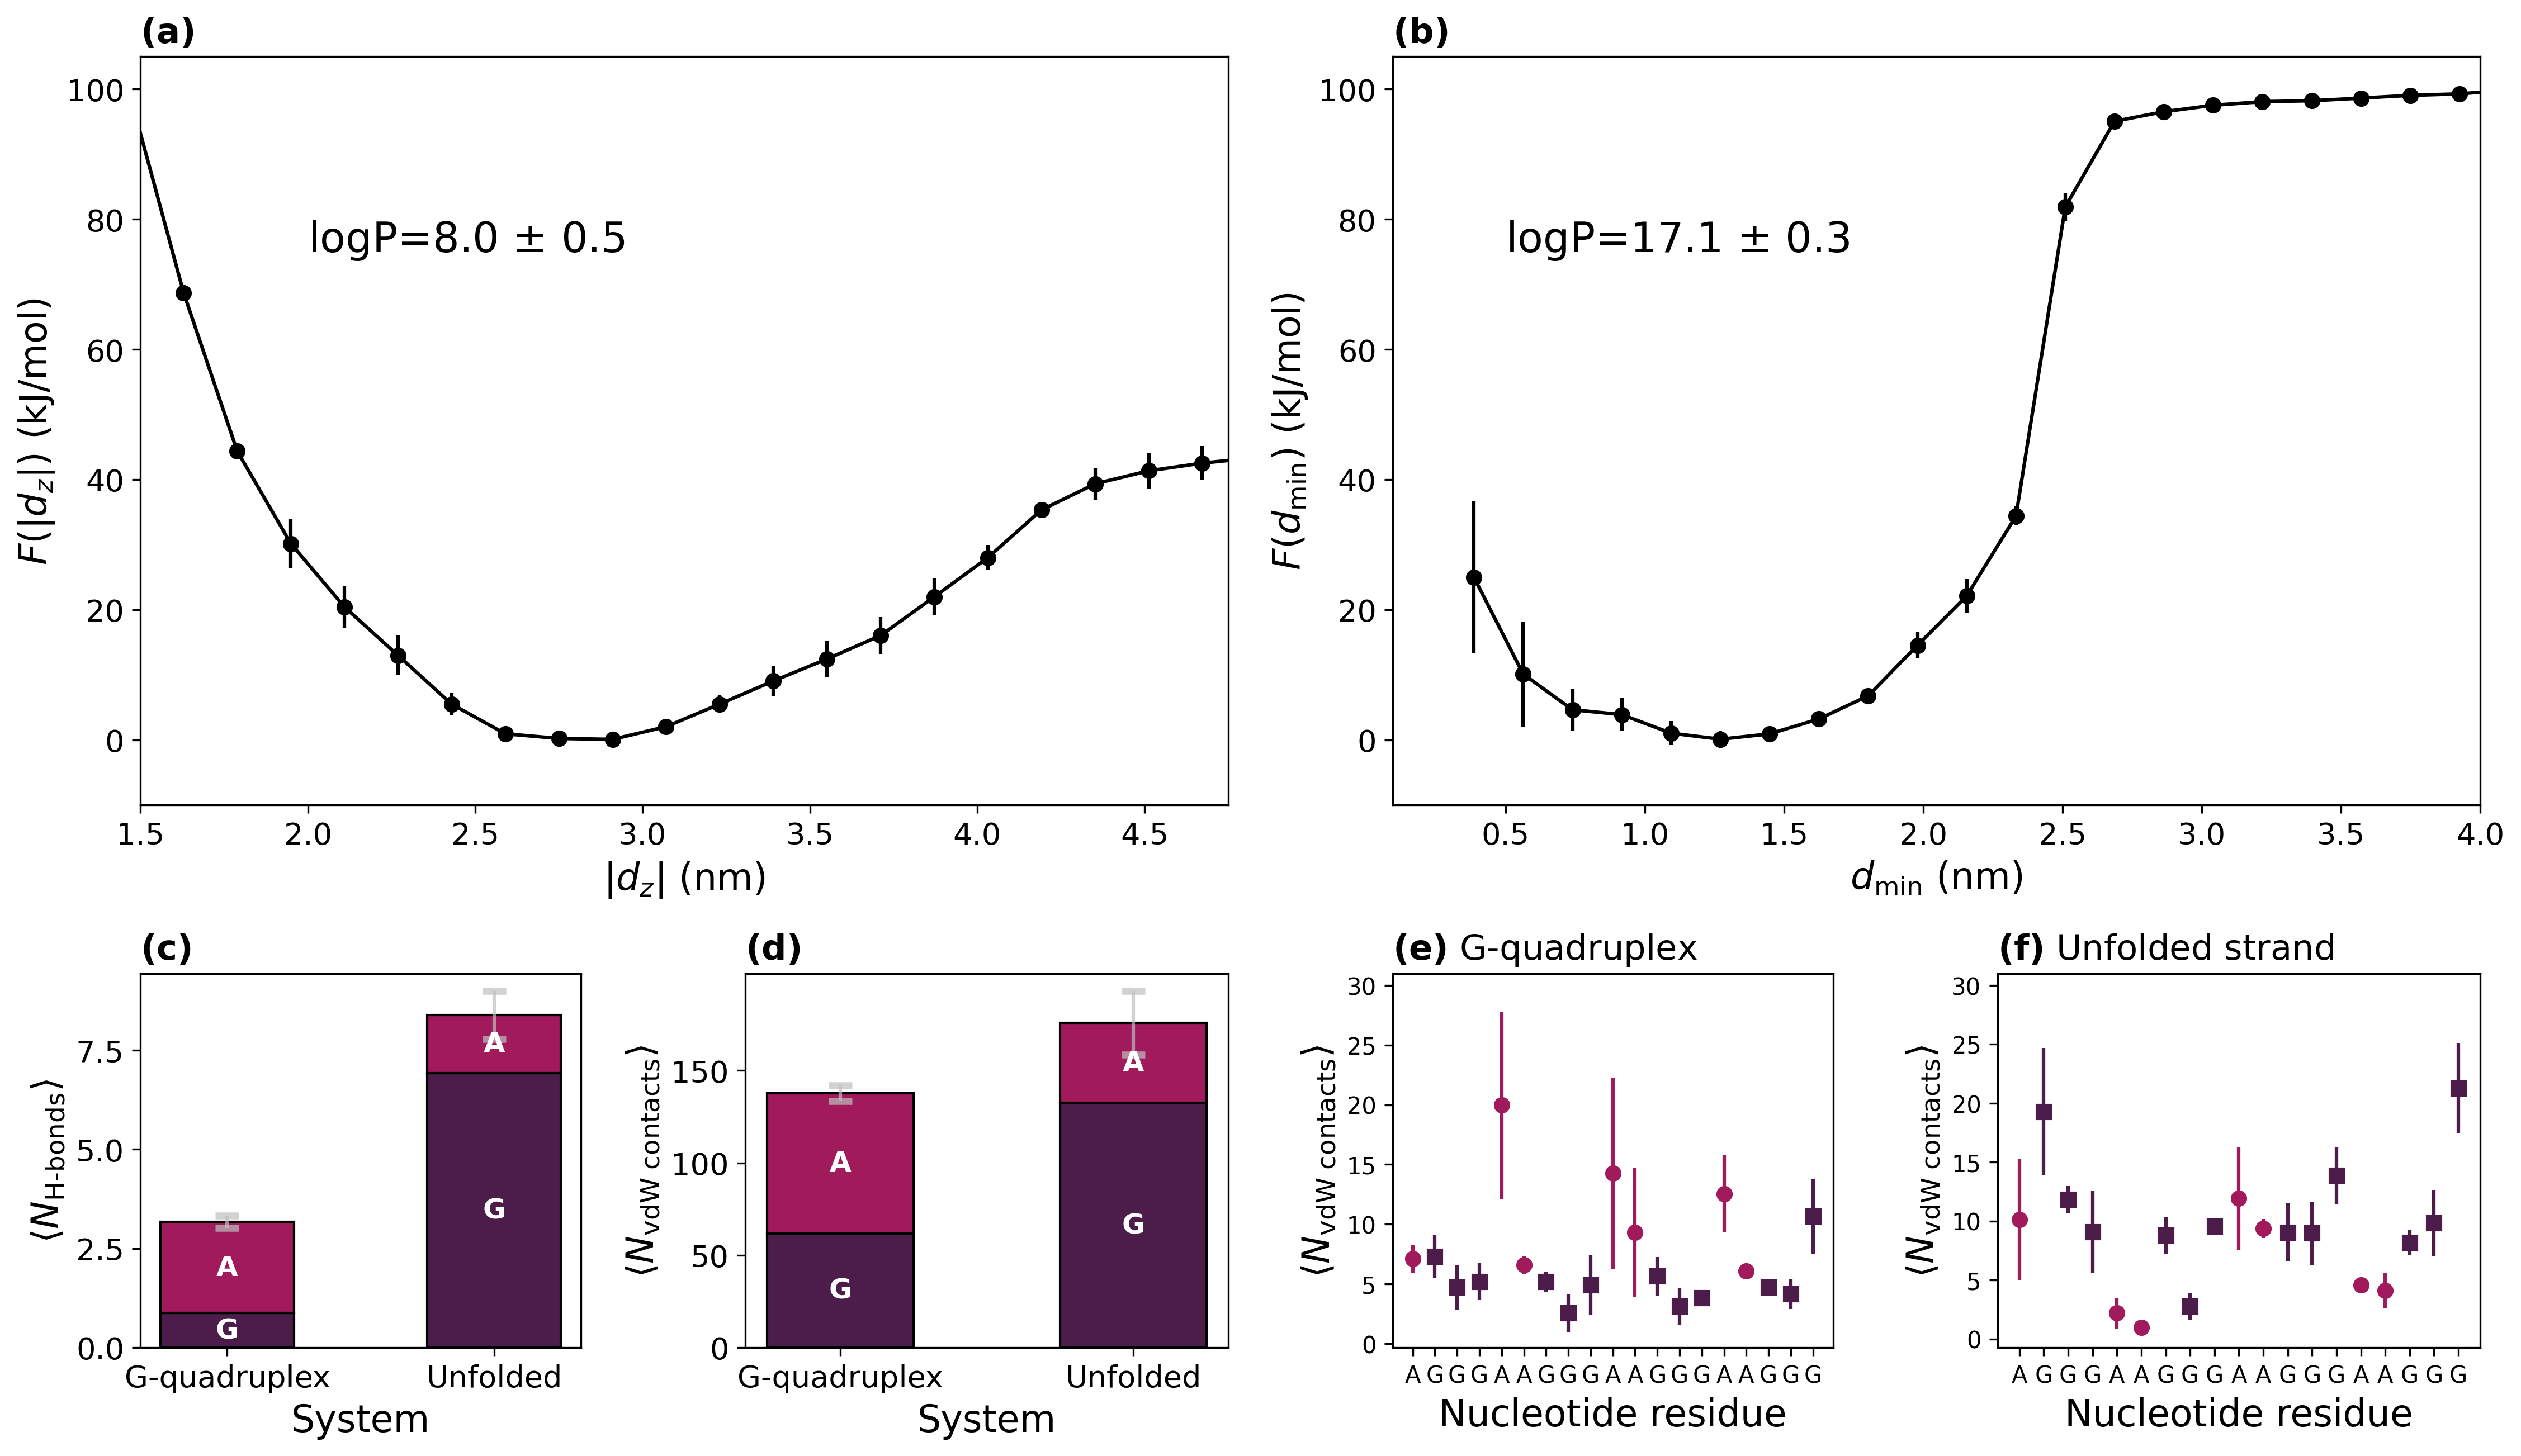

In [188]:
barwidth=0.75
col_G=sns.color_palette("rocket", 4)[0]
col_A=sns.color_palette("rocket", 4)[1]
col_C=sns.color_palette("rocket", 4)[3]
palette1 = sns.color_palette("rainbow", 12)
palette2 = sns.color_palette("rocket", 4)
palette2_int = sns.color_palette("rocket", 8)
palette3 = sns.color_palette("coolwarm", 4)
gs = gridspec.GridSpec(2, 6, width_ratios=[0.2, 0.2,0.7,0.2,0.2,0.7], height_ratios=[0.8, 0.4])
palette2_int = sns.color_palette("rocket", 3)
palette2_30 = sns.color_palette("rocket", 30)
c1=sns.color_palette("rocket", 4)[0]
c2= sns.color_palette("rocket", 30)[13]

# Define font size

# Create the subplots
fig = plt.figure(figsize=(18, 10),dpi=300)
fig.subplots_adjust(wspace=0.65, hspace=0.3)
ax1 = plt.subplot(gs[0,:3]) # FES quadruplex
ax2 = plt.subplot(gs[0, 3:])    #fes strand
ax3 = plt.subplot(gs[1, 0:2])  #hbonds avg quadruplex+strand
ax4 = plt.subplot(gs[1, 2:3])  #vdw avg quadruplex+strand

ax5 = plt.subplot(gs[1, 3:5])   #vdw per residue quadruplex
ax6 = plt.subplot(gs[1, 5:6]) #vdw per residue strand 

ax1.tick_params(axis='both', which='major', labelsize=13)
ax2.tick_params(axis='both', which='major', labelsize=13)
ax3.tick_params(axis='both', which='major', labelsize=13)
ax4.tick_params(axis='both', which='major', labelsize=13)

font_size=16
##1.Plotting G4 FES.
nucls=["quadruplex"]
for i_nucl,nucl in enumerate(nucls):
    fes_data=np.loadtxt("fig_data/fes/fes_"+str(nucl))
    ax1.errorbar(fes_data[::3,0],fes_data[::3,1],fes_data[::3,2],marker='o',label=nucl,color='black')
ax1.text(2,75,s="logP="+str(logp_quad[0])+" $\pm$ " +str(logp_quad[1]),fontsize=18)
ax1.set_xlim(left=1.5,right=4.75)
ax1.set_xlabel("$|d_z|$ (nm)",size=font_size)
ax1.set_ylabel(r"$F(|d_z|)$ (kJ/mol)",size=font_size)
ax1.set_title("$\mathbf{(a)}$",loc='left',fontsize=15)
ax1.set_ylim(top=105,bottom=-10)

#2. Strand FES

nucls=["strand"]
for i_nucl,nucl in enumerate(nucls):
    fes_data=np.loadtxt("fig_data/fes/fes_"+str(nucl))
    ax2.errorbar(fes_data[::3,0],fes_data[::3,1],fes_data[::3,2],marker='o',label=nucl,color='black')
ax2.text(0.5,75,s="logP="+str(logp_strand[0])+" $\pm$ " +str(logp_strand[1]),fontsize=18)
ax2.set_xlabel(r"$d_{\text{min}}$ (nm)",size=font_size)
ax2.set_ylabel(r"$F(d_{\text{min}})$ (kJ/mol)",size=font_size)
ax2.set_title("$\mathbf{(b)}$",loc='left',fontsize=15)
ax2.set_xlim(right=4)
ax2.set_ylim(top=105,bottom=-10)

#3 Hbonds G4 vs strand
nucls=["G-quadruplex","Unfolded"]
ax3.errorbar(nucls,hbonds_data[:,0],yerr=hbonds_data[:,1],fmt='none',barsabove=True,capsize=5,capthick=3,c='silver',alpha=0.7)
for i in range(len(nucls)):
    ax3.bar(nucls[i],nGAs_HB[i,0],edgecolor='black',ecolor='red',width=0.5,color=col_G)
    ax3.text(nucls[i], nGAs_HB[i, 0] / 2, "G", ha='center', va='center', color='white',fontweight='bold',fontsize=12)

    ax3.bar(nucls[i],nGAs_HB[i,2],bottom=nGAs_HB[i,0],edgecolor='black',ecolor='red',width=0.5,color=col_A)
    ax3.text(nucls[i], nGAs_HB[i, 0] + nGAs_HB[i, 2] / 2, "A", ha='center', va='center', color='white',fontweight='bold',fontsize=12)

#ax2.bar(nucls,hbonds_data[:,0],edgecolor='black',ecolor='red',width=0.5,color=palette2_int)
#ax2.errorbar(nucls,hbonds_data[:,0],yerr=hbonds_data[:,1],fmt='none',barsabove=True,capsize=5,capthick=3,c='silver')
ax3.set_ylabel(r"$\langle N_{\text{H-bonds}}\rangle$",size=font_size)
ax3.set_xlabel("System",size=font_size)
ax3.set_yticks([0,2.5,5,7.5])
ax3.set_title("$\mathbf{(c)}$",loc='left',fontsize=15)



#4 vdW contacts G4 vs strand

ax4.errorbar(nucls,vdw_data[:,0],yerr=vdw_data[:,1],fmt='none',barsabove=True,capsize=5,capthick=3,c='silver',alpha=0.7)
for i in range(len(nucls)):
    ax4.bar(nucls[i],nGAs_vdw[i,0],edgecolor='black',ecolor='red',width=0.5,color=c1)
    ax4.text(nucls[i], nGAs_vdw[i, 0] / 2, "G", ha='center', va='center', color='white',fontweight='bold',fontsize=12)

    ax4.bar(nucls[i],nGAs_vdw[i,2],bottom=nGAs_vdw[i,0],edgecolor='black',ecolor='red',width=0.5,color=col_A)
    ax4.text(nucls[i], nGAs_vdw[i, 0] + nGAs_vdw[i, 2] / 2, "A", ha='center', va='center', color='white',fontweight='bold',fontsize=12)
ax4.set_yticks([0,50,100,150])
ax4.set_ylabel(r"$\langle N_{\text{vdW contacts}}\rangle$",size=font_size)
ax4.set_xlabel("System",size=font_size)
ax4.set_title("$\mathbf{(d)}$",loc='left',fontsize=15)


##5. ResContact quadruplex
string="AGGGAAGGGAAGGGAAGGG"
list=[str for str in string]
avgs=res_cont_quad[:,0]
errs=res_cont_quad[:,1]
for i_str,str_nucl in enumerate(list):
    if str_nucl=="A":
        ax5.plot(i_str,avgs[i_str],marker='o',color=col_A)
        ax5.errorbar(i_str,avgs[i_str],yerr=errs[i_str],color=col_A)
    else:
        ax5.plot(i_str,avgs[i_str],marker='s',color=palette2[0])
        ax5.errorbar(i_str,avgs[i_str],yerr=errs[i_str],color=palette2[0])
ax5.set_ylim(top=31)

ax5.set_xticks(ticks=np.arange(0,19,1),labels=list)
ax5.set_xlabel("Nucleotide residue",size=font_size)
ax5.set_ylabel(r"$\langle N_{\text{vdW contacts}}\rangle$",size=font_size)
ax5.set_title("$\mathbf{(e)}$ G-quadruplex",loc='left',fontsize=15)


#6. Rescontact strand
string="AGGGAAGGGAAGGGAAGGG"
list=[str for str in string]
avgs=res_cont_strand[:,0]
errs=res_cont_strand[:,1]
for i_str,str_nucl in enumerate(list):
    if str_nucl=="A":
        ax6.plot(i_str,avgs[i_str],marker='o',color=col_A)
        ax6.errorbar(i_str,avgs[i_str],yerr=errs[i_str],color=col_A)
    else:
        ax6.plot(i_str,avgs[i_str],marker='s',color=palette2[0])
        ax6.errorbar(i_str,avgs[i_str],yerr=errs[i_str],color=palette2[0])
ax6.set_ylim(top=31)
ax6.set_xticks(ticks=np.arange(0,19,1),labels=list)
ax6.set_xlabel("Nucleotide residue",size=font_size)
ax6.set_ylabel(r"$\langle N_{\text{vdW contacts}}\rangle$",size=font_size)
ax6.set_title("$\mathbf{(f)}$ Unfolded strand",loc='left',fontsize=15)
plt.savefig('fig_data/quadruplex-strand.pdf', transparent=True,bbox_inches='tight')
plt.show()

## Fig. 4

In [7]:
nucls=["dsRNA","Elongated ssRNA"]
logp_data=np.loadtxt("fig_data/fes/logPs_hairpins")
hbonds_data=np.loadtxt("fig_data/contacts/tot_hbonds_memb_hairpins")
chol_data=np.loadtxt("fig_data/contacts/chol_contacts_hairpins")
vdw_data=np.loadtxt("fig_data/contacts/vdws_hairpins")
nGCs_HB=np.loadtxt("fig_data/contacts/nGCs_HB_hairpins")
nGCs_vdw=np.loadtxt("fig_data/contacts/nGCs_vdw_hairpins")

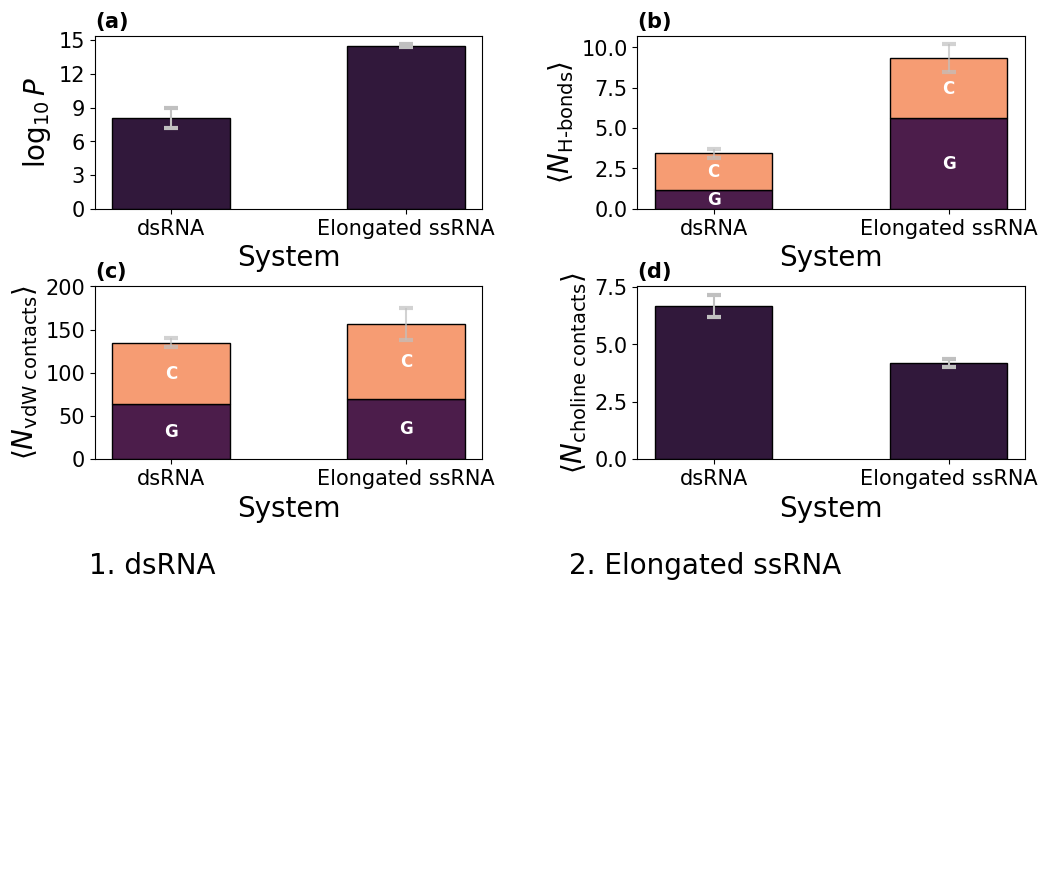

In [39]:
palette2_int = sns.color_palette("rocket", 3)
palette2_30 = sns.color_palette("rocket", 30)
c1=sns.color_palette("rocket", 4)[0]
c2= sns.color_palette("rocket", 4)[3]
col_G=sns.color_palette("rocket", 4)[0]
col_A=sns.color_palette("rocket", 4)[1]
col_C=sns.color_palette("rocket", 4)[3]
logks=logp_data[:,0]
err_logks=logp_data[:,1]
fig = plt.figure(figsize=(12, 12))
fig.subplots_adjust(wspace=0.4, hspace=0.45)
gs = gridspec.GridSpec(4, 2, width_ratios=[0.5,0.5], height_ratios=[0.5, 0.5,0.5,0.5])
ax1 = plt.subplot(gs[0, 0])   # Top right plot
ax2 = plt.subplot(gs[0, 1])   # Bottom left plot
ax3 = plt.subplot(gs[1, 0])   # Bottom middle plot
ax4=plt.subplot(gs[1,1])
ax1.tick_params(axis='both', which='major', labelsize=15)
ax2.tick_params(axis='both', which='major', labelsize=15)
ax3.tick_params(axis='both', which='major', labelsize=15)
ax4.tick_params(axis='both', which='major', labelsize=15)

font_size=20
#Plotting all logPs
small_spacing=0.55
big_spacing=0.8
ax1.set_title("$\mathbf{(a)}$",loc='left',fontsize=15)

nucleosides=np.asarray([0,3,6,9]).astype(int)
dinucleotides=np.asarray([1,4,7,10]).astype(int)
trinucleotides=np.asarray([2,5,8,11]).astype(int)
logks=np.asarray(logks)
ax1.bar(nucls,logks,edgecolor='black',ecolor='red',width=0.5,color=palette2_30[3])
ax1.errorbar(nucls,logks,yerr=err_logks,fmt='none',barsabove=True,capsize=5,capthick=3,c='silver')
ax1.set_ylabel(r"$\log_{10}P$",size=font_size)
ax1.set_xlabel("System",size=font_size)
ax1.set_yticks([0,3,6,9,12,15])
#ax1.set_xlim(left=-1)


#2. Total hbonds
ax2.errorbar(nucls,hbonds_data[:,0],yerr=hbonds_data[:,1],fmt='none',barsabove=True,capsize=5,capthick=3,c='silver',alpha=0.7)
for i in range(len(nucls)):
    ax2.bar(nucls[i],nGCs_HB[i,0],edgecolor='black',ecolor='red',width=0.5,color=c1)
    ax2.text(nucls[i], nGCs_HB[i, 0] / 2, "G", ha='center', va='center', color='white',fontweight='bold',fontsize=12)

    ax2.bar(nucls[i],nGCs_HB[i,2],bottom=nGCs_HB[i,0],edgecolor='black',ecolor='red',width=0.5,color=col_C)
    ax2.text(nucls[i], nGCs_HB[i, 0] + nGCs_HB[i, 2] / 2, "C", ha='center', va='center', color='white',fontweight='bold',fontsize=12)

#ax2.bar(nucls,hbonds_data[:,0],edgecolor='black',ecolor='red',width=0.5,color=palette2_int)
#ax2.errorbar(nucls,hbonds_data[:,0],yerr=hbonds_data[:,1],fmt='none',barsabove=True,capsize=5,capthick=3,c='silver')
ax2.set_ylabel(r"$\langle N_{\text{H-bonds}}\rangle$",size=font_size)
ax2.set_xlabel("System",size=font_size)
ax2.set_yticks([0,2.5,5,7.5,10])
ax2.set_title("$\mathbf{(b)}$",loc='left',fontsize=15)




#3. VdW interactions

ax3.errorbar(nucls,vdw_data[:,0],yerr=vdw_data[:,1],fmt='none',barsabove=True,capsize=5,capthick=3,c='silver',alpha=0.7)
for i in range(len(nucls)):
    ax3.bar(nucls[i],nGCs_vdw[i,0],edgecolor='black',ecolor='red',width=0.5,color=c1)
    ax3.text(nucls[i], nGCs_vdw[i, 0] / 2, "G", ha='center', va='center', color='white',fontweight='bold',fontsize=12)

    ax3.bar(nucls[i],nGCs_vdw[i,2],bottom=nGCs_vdw[i,0],edgecolor='black',ecolor='red',width=0.5,color=col_C)
    ax3.text(nucls[i], nGCs_vdw[i, 0] + nGCs_vdw[i, 2] / 2, "C", ha='center', va='center', color='white',fontweight='bold',fontsize=12)
ax3.set_yticks([0,50,100,150,200])
#ax2.bar(nucls,hbonds_data[:,0],edgecolor='black',ecolor='red',width=0.5,color=palette2_int)
#ax2.errorbar(nucls,hbonds_data[:,0],yerr=hbonds_data[:,1],fmt='none',barsabove=True,capsize=5,capthick=3,c='silver')
ax3.set_ylabel(r"$\langle N_{\text{vdW contacts}}\rangle$",size=font_size)
ax3.set_xlabel("System",size=font_size)
ax3.set_title("$\mathbf{(c)}$",loc='left',fontsize=15)




#4. Cholines

 

ax4.bar(nucls,chol_data[:,0],edgecolor='black',ecolor='red',width=0.5,color=palette2_30[3])
ax4.errorbar(nucls,chol_data[:,0],yerr=chol_data[:,1],fmt='none',barsabove=True,capsize=5,capthick=3,c='silver')
ax4.set_ylabel(r"$\langle N_{\text{choline contacts}}\rangle$",size=font_size)
ax4.set_xlabel("System",size=font_size)
ax4.set_title("$\mathbf{(d)}$",loc='left',fontsize=15)
ax4.set_yticks([0,2.5,5,7.5])


path="fig_data/figs/"

subcaptions=["1. dsRNA","2. Elongated ssRNA"]
vpositions=[0.9,0.3]
hpositions=[0.12,0.52]
for i, (image_file, subcaption) in enumerate(zip(image_files, subcaptions)):
    # Load image
    # Subcaption in the top-left corner
    prop = fm.FontProperties(fname='latin-modern-roman.mroman17-regular.otf')
    fig.text(
        hpositions[i], 0.45, subcaption,  # Manually adjust vertical position
        ha='left', va='top',
        color='black', fontsize=20,
    )
    fig.text(
        hpositions[i], 0.2, "a",  # Manually adjust vertical position
        ha='left', va='top',
        color='white', fontsize=20,
    )

#plt.tight_layout()
plt.savefig('fig_data/hairpin_logp.pdf', transparent=True,bbox_inches='tight',dpi=600)
plt.show()

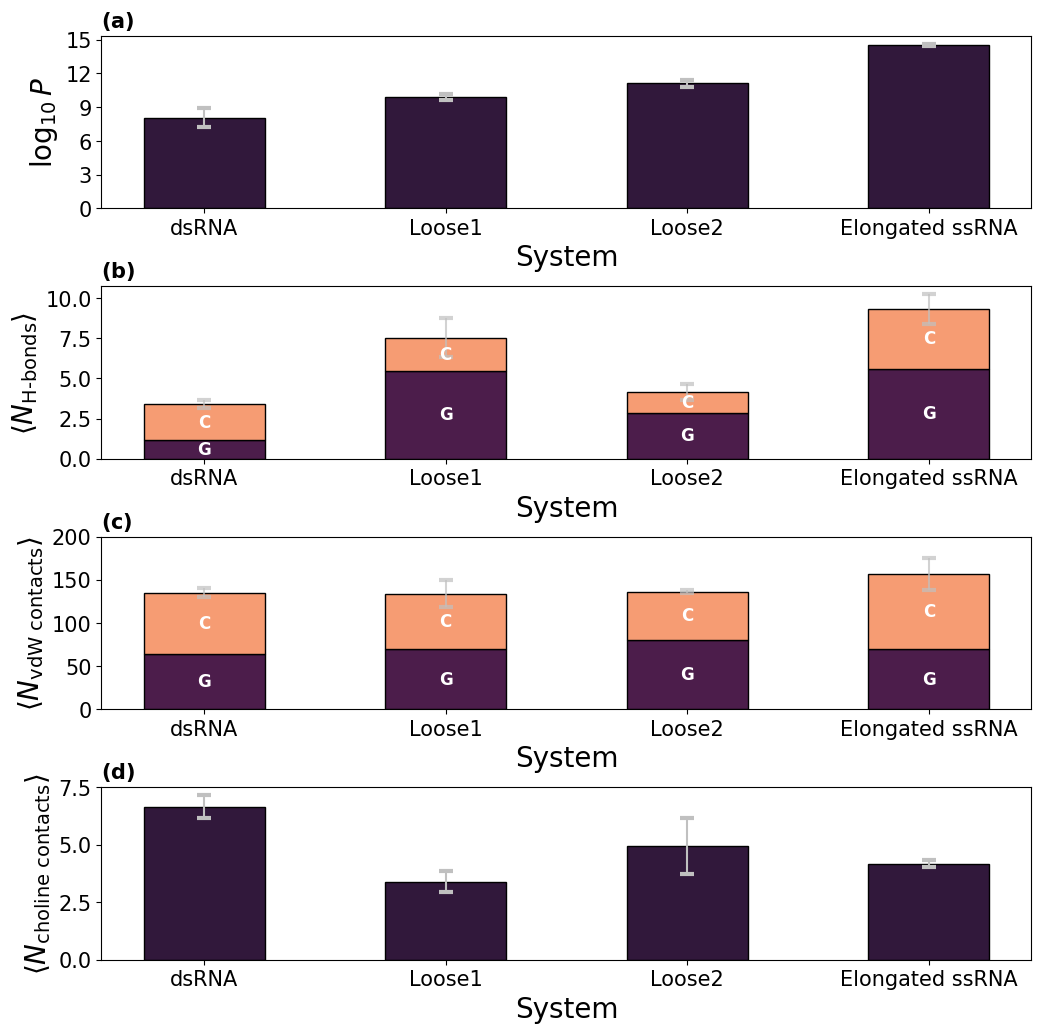

In [43]:
nucls=["dsRNA","Loose1","Loose2","Elongated ssRNA"]
logp_data=np.loadtxt("fig_data/fes/logPs_hairpins_withloose")
hbonds_data=np.loadtxt("fig_data/contacts/tot_hbonds_memb_hairpins_withloose")
chol_data=np.loadtxt("fig_data/contacts/chol_contacts_hairpins_withloose")
vdw_data=np.loadtxt("fig_data/contacts/vdws_hairpins_withloose")
nGCs_HB=np.loadtxt("fig_data/contacts/nGCs_HB_hairpins_withloose")
nGCs_vdw=np.loadtxt("fig_data/contacts/nGCs_vdw_hairpins_withloose")
palette2_int = sns.color_palette("rocket", 3)
palette2_30 = sns.color_palette("rocket", 30)
c1=sns.color_palette("rocket", 4)[0]
c2= sns.color_palette("rocket", 4)[3]
col_G=sns.color_palette("rocket", 4)[0]
col_A=sns.color_palette("rocket", 4)[1]
col_C=sns.color_palette("rocket", 4)[3]
logks=logp_data[:,0]
err_logks=logp_data[:,1]
fig = plt.figure(figsize=(12, 12))
fig.subplots_adjust(wspace=0.4, hspace=0.45)
gs = gridspec.GridSpec(4, 1, width_ratios=[0.5], height_ratios=[0.5, 0.5,0.5,0.5])
ax1 = plt.subplot(gs[0, 0])   # Top right plot
ax2 = plt.subplot(gs[1, 0])   # Bottom left plot
ax3 = plt.subplot(gs[2, 0])   # Bottom middle plot
ax4=plt.subplot(gs[3,0])
ax1.tick_params(axis='both', which='major', labelsize=15)
ax2.tick_params(axis='both', which='major', labelsize=15)
ax3.tick_params(axis='both', which='major', labelsize=15)
ax4.tick_params(axis='both', which='major', labelsize=15)

font_size=20
#Plotting all logPs
small_spacing=0.55
big_spacing=0.8
ax1.set_title("$\mathbf{(a)}$",loc='left',fontsize=15)

nucleosides=np.asarray([0,3,6,9]).astype(int)
dinucleotides=np.asarray([1,4,7,10]).astype(int)
trinucleotides=np.asarray([2,5,8,11]).astype(int)
logks=np.asarray(logks)
ax1.bar(nucls,logks,edgecolor='black',ecolor='red',width=0.5,color=palette2_30[3])
ax1.errorbar(nucls,logks,yerr=err_logks,fmt='none',barsabove=True,capsize=5,capthick=3,c='silver')
ax1.set_ylabel(r"$\log_{10}P$",size=font_size)
ax1.set_xlabel("System",size=font_size)
ax1.set_yticks([0,3,6,9,12,15])
#ax1.set_xlim(left=-1)


#2. Total hbonds
ax2.errorbar(nucls,hbonds_data[:,0],yerr=hbonds_data[:,1],fmt='none',barsabove=True,capsize=5,capthick=3,c='silver',alpha=0.7)
for i in range(len(nucls)):
    ax2.bar(nucls[i],nGCs_HB[i,0],edgecolor='black',ecolor='red',width=0.5,color=c1)
    ax2.text(nucls[i], nGCs_HB[i, 0] / 2, "G", ha='center', va='center', color='white',fontweight='bold',fontsize=12)

    ax2.bar(nucls[i],nGCs_HB[i,2],bottom=nGCs_HB[i,0],edgecolor='black',ecolor='red',width=0.5,color=col_C)
    ax2.text(nucls[i], nGCs_HB[i, 0] + nGCs_HB[i, 2] / 2, "C", ha='center', va='center', color='white',fontweight='bold',fontsize=12)

#ax2.bar(nucls,hbonds_data[:,0],edgecolor='black',ecolor='red',width=0.5,color=palette2_int)
#ax2.errorbar(nucls,hbonds_data[:,0],yerr=hbonds_data[:,1],fmt='none',barsabove=True,capsize=5,capthick=3,c='silver')
ax2.set_ylabel(r"$\langle N_{\text{H-bonds}}\rangle$",size=font_size)
ax2.set_xlabel("System",size=font_size)
ax2.set_yticks([0,2.5,5,7.5,10])
ax2.set_title("$\mathbf{(b)}$",loc='left',fontsize=15)




#3. VdW interactions

ax3.errorbar(nucls,vdw_data[:,0],yerr=vdw_data[:,1],fmt='none',barsabove=True,capsize=5,capthick=3,c='silver',alpha=0.7)
for i in range(len(nucls)):
    ax3.bar(nucls[i],nGCs_vdw[i,0],edgecolor='black',ecolor='red',width=0.5,color=c1)
    ax3.text(nucls[i], nGCs_vdw[i, 0] / 2, "G", ha='center', va='center', color='white',fontweight='bold',fontsize=12)

    ax3.bar(nucls[i],nGCs_vdw[i,2],bottom=nGCs_vdw[i,0],edgecolor='black',ecolor='red',width=0.5,color=col_C)
    ax3.text(nucls[i], nGCs_vdw[i, 0] + nGCs_vdw[i, 2] / 2, "C", ha='center', va='center', color='white',fontweight='bold',fontsize=12)
ax3.set_yticks([0,50,100,150,200])
#ax2.bar(nucls,hbonds_data[:,0],edgecolor='black',ecolor='red',width=0.5,color=palette2_int)
#ax2.errorbar(nucls,hbonds_data[:,0],yerr=hbonds_data[:,1],fmt='none',barsabove=True,capsize=5,capthick=3,c='silver')
ax3.set_ylabel(r"$\langle N_{\text{vdW contacts}}\rangle$",size=font_size)
ax3.set_xlabel("System",size=font_size)
ax3.set_title("$\mathbf{(c)}$",loc='left',fontsize=15)




#4. Cholines

 

ax4.bar(nucls,chol_data[:,0],edgecolor='black',ecolor='red',width=0.5,color=palette2_30[3])
ax4.errorbar(nucls,chol_data[:,0],yerr=chol_data[:,1],fmt='none',barsabove=True,capsize=5,capthick=3,c='silver')
ax4.set_ylabel(r"$\langle N_{\text{choline contacts}}\rangle$",size=font_size)
ax4.set_xlabel("System",size=font_size)
ax4.set_title("$\mathbf{(d)}$",loc='left',fontsize=15)
ax4.set_yticks([0,2.5,5,7.5])


#plt.tight_layout()
plt.savefig('fig_data/hairpin_withloose_logp.pdf', transparent=True,bbox_inches='tight',dpi=600)
plt.show()

## Supplementary figures

## Fig.

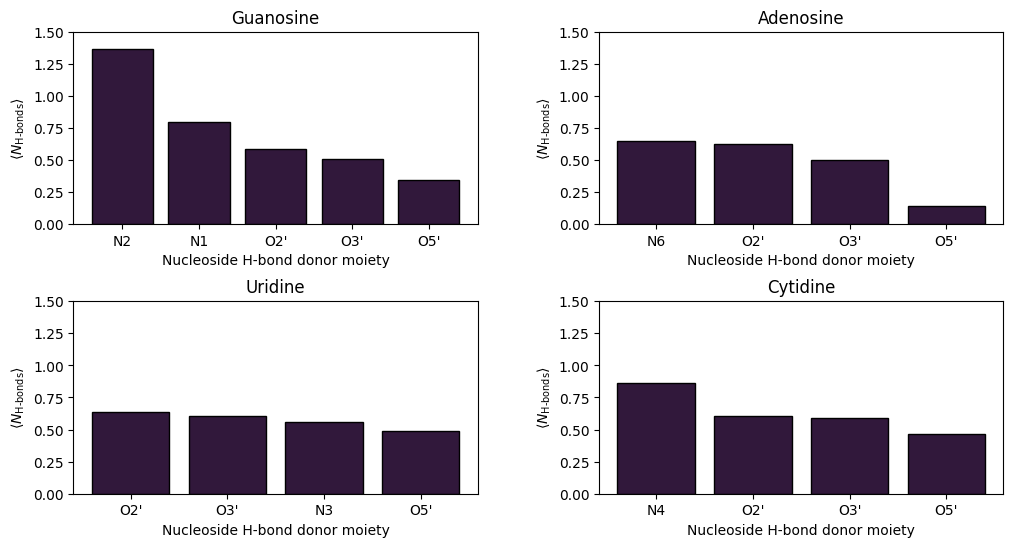

In [343]:
gs = gridspec.GridSpec(2, 2, width_ratios=[0.5, 0.5], height_ratios=[0.5, 0.5])

# Define font size
font_size = 13

# Create the subplots
fig = plt.figure(figsize=(12, 6))
fig.subplots_adjust(wspace=0.3, hspace=0.4)
ax1 = plt.subplot(gs[0, 0])
ax2 = plt.subplot(gs[0, 1])   
ax3 = plt.subplot(gs[1, 0])  
ax4 = plt.subplot(gs[1, 1]) 
axs=[[0,0],[0,1],[1,0],[1,1]]
bases=["Guanosine","Adenosine","Uridine","Cytidine"]
nucls="G","A","U","C"
for i_nucl,nucl in enumerate(nucls):
    data=np.genfromtxt("fig_data/contacts/donor_moieties_"+str(nucl),dtype=str)
    ax=plt.subplot(gs[axs[i_nucl][0],axs[i_nucl][1]])
    for i in range(len(data)):
        
        ax.bar(data[i,0],float(data[i,1]),color=palette2_30[3],edgecolor='black')
        ax.set_title(bases[i_nucl])
        ax.set_ylabel(r"$\langle N_{\text{H-bonds}}\rangle$")
        ax.set_xlabel("Nucleoside H-bond donor moiety")
        ax.set_ylim(top=1.5)
plt.savefig('fig_data/donormoieties_nucleosides.pdf', transparent=True,bbox_inches='tight')

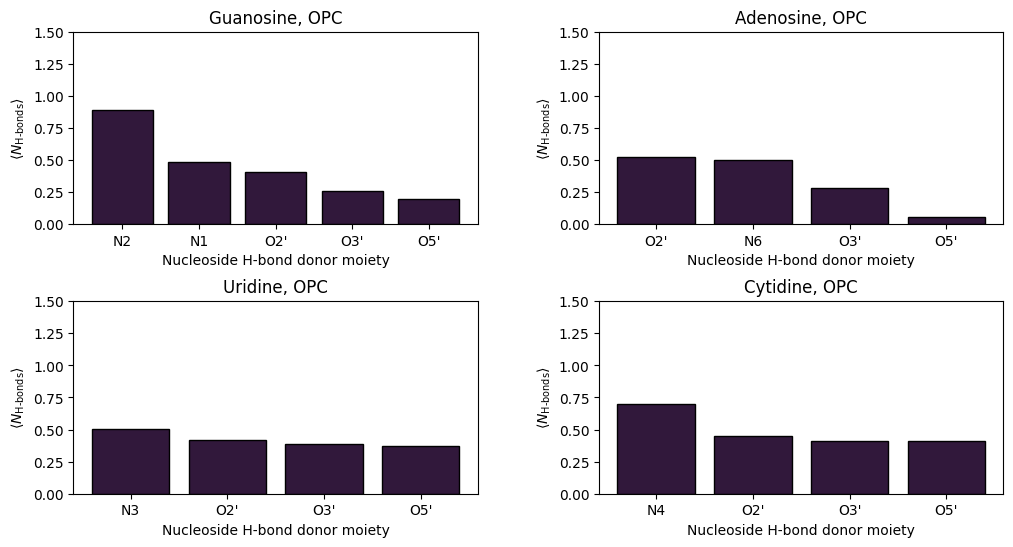

In [167]:
gs = gridspec.GridSpec(2, 2, width_ratios=[0.5, 0.5], height_ratios=[0.5, 0.5])

# Define font size
font_size = 13

# Create the subplots
fig = plt.figure(figsize=(12, 6))
fig.subplots_adjust(wspace=0.3, hspace=0.4)
ax1 = plt.subplot(gs[0, 0])
ax2 = plt.subplot(gs[0, 1])   
ax3 = plt.subplot(gs[1, 0])  
ax4 = plt.subplot(gs[1, 1]) 
axs=[[0,0],[0,1],[1,0],[1,1]]
bases=["Guanosine, OPC","Adenosine, OPC","Uridine, OPC","Cytidine, OPC"]
nucls="G_opc","A_opc","U_opc","C_opc"
for i_nucl,nucl in enumerate(nucls):
    data=np.genfromtxt("fig_data/contacts/donor_moieties_"+str(nucl),dtype=str)
    ax=plt.subplot(gs[axs[i_nucl][0],axs[i_nucl][1]])
    for i in range(len(data)):
        
        ax.bar(data[i,0],float(data[i,1]),color=palette2_30[3],edgecolor='black')
        ax.set_title(bases[i_nucl])
        ax.set_ylabel(r"$\langle N_{\text{H-bonds}}\rangle$")
        ax.set_xlabel("Nucleoside H-bond donor moiety")
        ax.set_ylim(top=1.5)
plt.savefig('fig_data/donormoieties_nucleosides_opc.pdf', transparent=True,bbox_inches='tight')

## Fig.

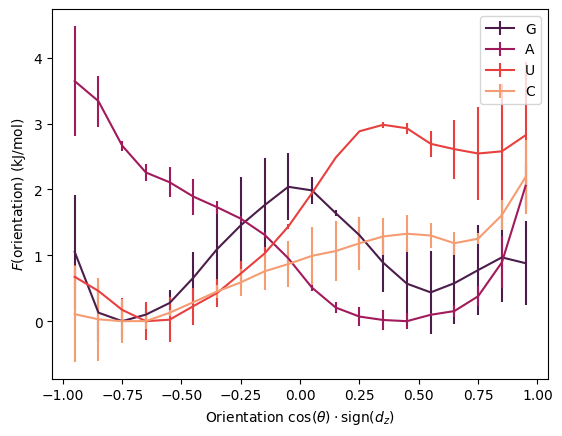

In [11]:
nucls=["G","A","U","C"]
for i_nucl,nucl in enumerate(nucls):
    data=np.loadtxt("fig_data/orientations/orientation1d_"+nucl)
    plt.errorbar(data[:,0],data[:,1]-np.min(data[:,1]),yerr=data[:,2],color=palette2[i_nucl],label=nucl)
plt.xlabel(r"Orientation $\cos(\theta)\cdot \text{sign}(d_z)$")
plt.ylabel(r"$F(\text{orientation})$ (kJ/mol)")
plt.legend()
plt.savefig('fig_data/orientation1d.pdf', transparent=True,bbox_inches='tight')
plt.show()

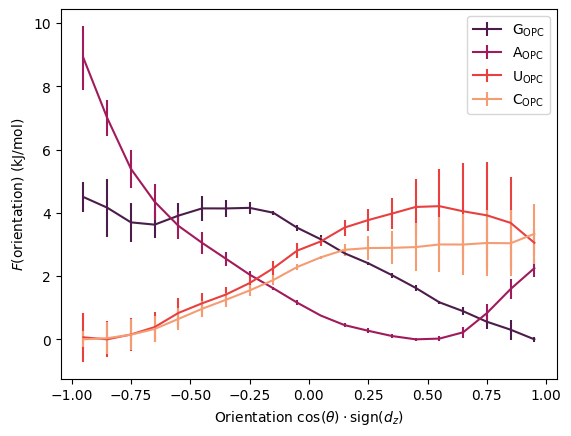

In [5]:
nucls=["G_opc","A_opc","U_opc","C_opc"]
text_opc=r"$_{\text{OPC}}$"
for i_nucl,nucl in enumerate(nucls):
    
    data=np.loadtxt("fig_data/orientations/orientation1d_"+nucl)
    plt.errorbar(data[:,0],data[:,1]-np.min(data[:,1]),yerr=data[:,2],color=palette2[i_nucl],label=nucl[0]+text_opc)
plt.xlabel(r"Orientation $\cos(\theta)\cdot \text{sign}(d_z)$")
plt.ylabel(r"$F(\text{orientation})$ (kJ/mol)")
plt.legend()
plt.savefig('fig_data/orientation1d_opc.pdf', transparent=True,bbox_inches='tight')
plt.show()

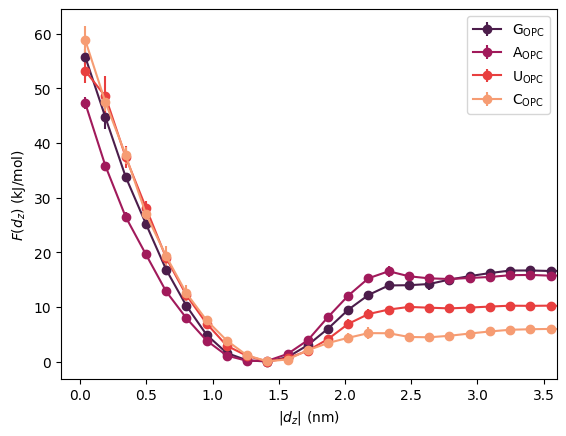

In [6]:
nucls=["G_opc","A_opc","U_opc","C_opc"]
text_opc=r"$_{\text{OPC}}$"
for i_nucl,nucl in enumerate(nucls):
    fes_data=np.loadtxt("fig_data/fes/fes_"+str(nucl))
    plt.errorbar(fes_data[::2,0],fes_data[::2,1],fes_data[::2,2],marker='o',label=nucl[0]+text_opc,color=palette2[i_nucl])
plt.xlim(right=3.6)
plt.xlabel(r"$|d_z|$ (nm)")
plt.ylabel(r"$F(d_z$) (kJ/mol)")
plt.legend()
plt.savefig('fig_data/fes_nucleosides_opc.pdf', transparent=True,bbox_inches='tight')
plt.show()

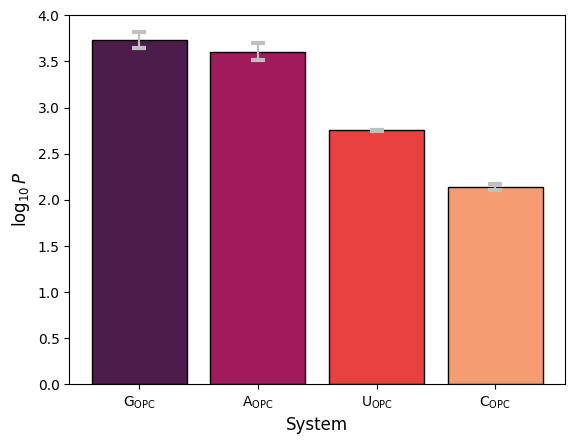

In [7]:
logPs=np.loadtxt("fig_data/fes/logPs_nucleosides_opc")
text_opc=r"$_{\text{OPC}}$"
nucls="G"+text_opc,"A"+text_opc,"U"+text_opc,"C"+text_opc
plt.bar(nucls,logPs[:,0],color=palette2,edgecolor='black')
plt.errorbar(nucls,logPs[:,0],yerr=logPs[:,1],fmt='none',barsabove=True,capsize=5,capthick=3,c='silver')
plt.xlabel("System",fontsize=12)
plt.ylabel(r"$\log_{10}P$",fontsize=12)
plt.savefig('fig_data/logP_nucleosides_OPC.pdf', transparent=True,bbox_inches='tight')
plt.show()

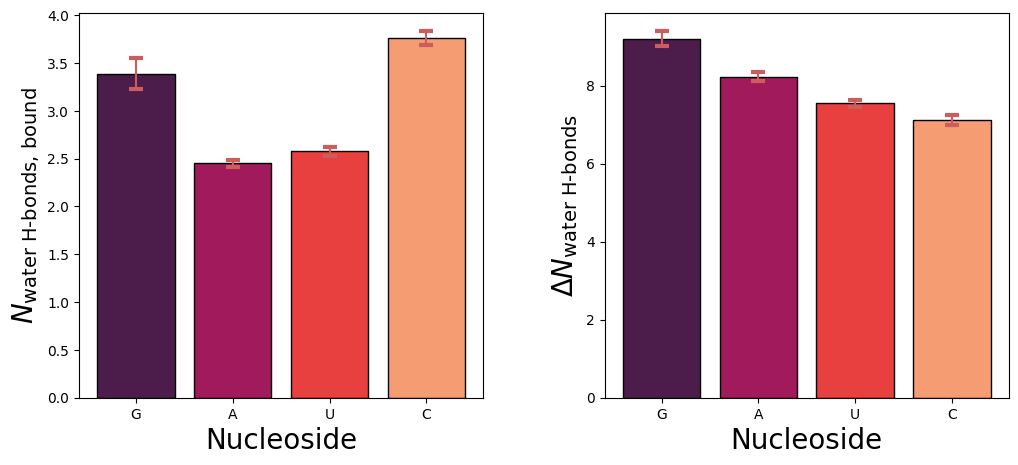

In [109]:
gs = gridspec.GridSpec(1, 2)
fig = plt.figure(figsize=(12, 5))
fig.subplots_adjust(wspace=0.3, hspace=0.3)
ax1 = plt.subplot(gs[0, 0])
ax2 = plt.subplot(gs[0, 1])   
ax1.set_xlabel("Nucleoside",size=font_size)
ax2.set_xlabel("Nucleoside",size=font_size)
ax1.set_ylabel(r"$N_{\text{water H-bonds, bound}}$",size=font_size)
ax2.set_ylabel(r"$\Delta N_{\text{water H-bonds}}$",size=font_size)
nucls=["G","A","U","C"]
nhbonds_bound=np.loadtxt("fig_data/contacts/hbonds_wat_bound_nucleosides")

for i_nucl,nucl in enumerate(nucls):
    ax1.bar(nucl,nhbonds_bound[i_nucl,0],color=palette2[i_nucl],edgecolor='black')
    ax1.errorbar(nucl,nhbonds_bound[i_nucl,0],yerr=nhbonds_bound[i_nucl,1],fmt='none',barsabove=True,capsize=5,capthick=3,c=error_color)

diff_hbonds=np.loadtxt("fig_data/contacts/diff_hbonds_wat_nucleosides")

for i_nucl,nucl in enumerate(nucls):
    ax2.bar(nucl,diff_hbonds[i_nucl,0],color=palette2[i_nucl],edgecolor='black')
    ax2.errorbar(nucl,diff_hbonds[i_nucl,0],yerr=diff_hbonds[i_nucl,1],fmt='none',barsabove=True,capsize=5,capthick=3,c=error_color)
plt.savefig('fig_data/hbonds_water.pdf', transparent=True,bbox_inches='tight')
plt.show()


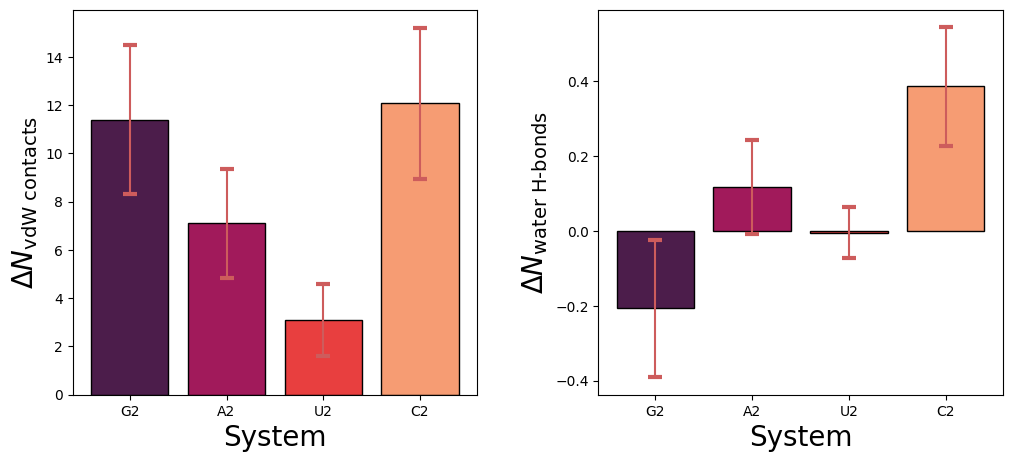

In [107]:
gs = gridspec.GridSpec(1, 2)
fig = plt.figure(figsize=(12, 5))
fig.subplots_adjust(wspace=0.3, hspace=0.3)
ax1 = plt.subplot(gs[0, 0])
ax2 = plt.subplot(gs[0, 1])   
ax1.set_xlabel("System",size=font_size)
ax2.set_xlabel("System",size=font_size)
ax1.set_ylabel(r"$\Delta N_{\text{vdW contacts}}$",size=font_size)
ax2.set_ylabel(r"$\Delta N_{\text{water H-bonds}}$",size=font_size)
nucls=["G2","A2","U2","C2"]
deltavdws_pucker=np.loadtxt("fig_data/contacts/vdw_puckerdiffs_dinucleotides")

for i_nucl,nucl in enumerate(nucls):
    ax1.bar(nucl,deltavdws_pucker[i_nucl,0],color=palette2[i_nucl],edgecolor='black')
    ax1.errorbar(nucl,deltavdws_pucker[i_nucl,0],yerr=deltavdws_pucker[i_nucl,1],fmt='none',barsabove=True,capsize=5,capthick=3,c=error_color)

diff_hbonds=np.loadtxt("fig_data/contacts/hb_puckerdiffs_dinucleotides")

for i_nucl,nucl in enumerate(nucls):
    ax2.bar(nucl,diff_hbonds[i_nucl,0],color=palette2[i_nucl],edgecolor='black')
    ax2.errorbar(nucl,diff_hbonds[i_nucl,0],yerr=diff_hbonds[i_nucl,1],fmt='none',barsabove=True,capsize=5,capthick=3,c=error_color)
plt.savefig('fig_data/diff_pucker_dinucleotides.pdf', transparent=True,bbox_inches='tight')
plt.show()


## Fig.

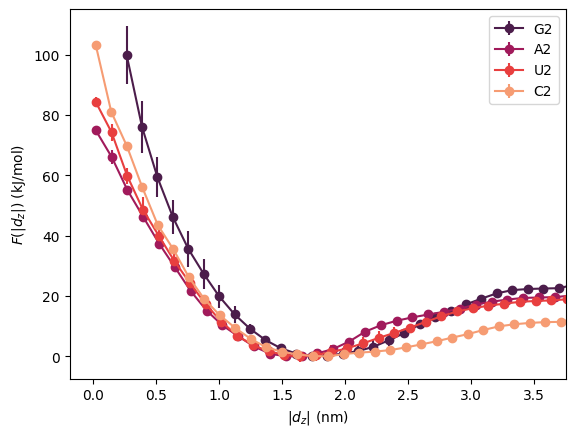

In [12]:
nucls=["G2","A2","U2","C2"]
for i_nucl,nucl in enumerate(nucls):
    fes_data=np.loadtxt("fig_data/fes/fes_"+str(nucl))
    plt.errorbar(fes_data[::3,0],fes_data[::3,1],fes_data[::3,2],marker='o',label=nucl,color=palette2[i_nucl])
plt.xlim(right=3.75)
plt.xlabel(r"$|d_z|$ (nm)")
plt.ylabel(r"$F(|d_z|$) (kJ/mol)")
plt.legend()
plt.savefig('fig_data/fes_dinucleotides.pdf', transparent=True,bbox_inches='tight')
plt.show()

## Fig.

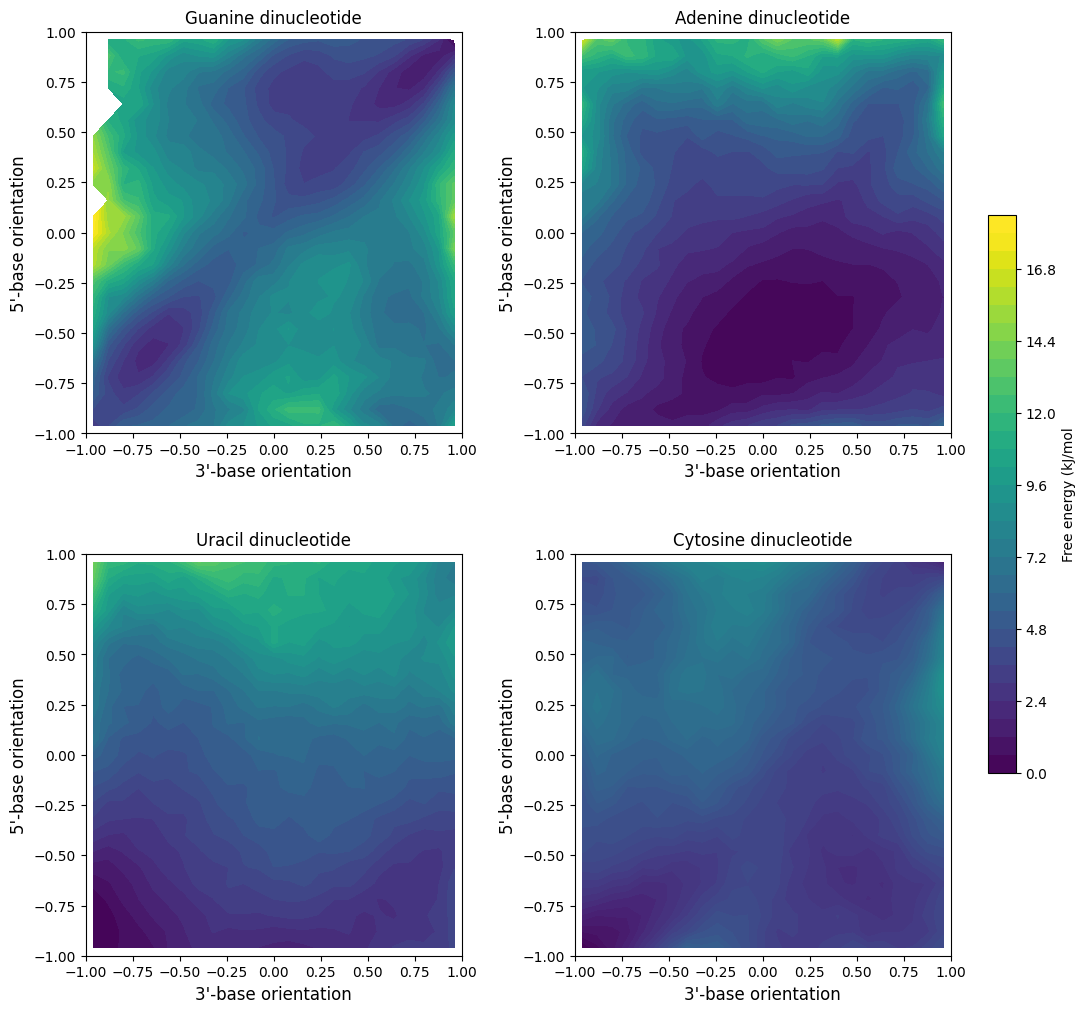

In [13]:
gs = gridspec.GridSpec(2, 2, width_ratios=[0.5, 0.5], height_ratios=[0.5, 0.5])
fig = plt.figure(figsize=(12, 12))
fig.subplots_adjust(wspace=0.3, hspace=0.3)
ax1 = plt.subplot(gs[0, 0])
ax2 = plt.subplot(gs[0, 1])   
ax3 = plt.subplot(gs[1, 0])  
ax4 = plt.subplot(gs[1, 1]) 
axs=[[0,0],[0,1],[1,0],[1,1]]
bases=["Guanine dinucleotide","Adenine dinucleotide","Uracil dinucleotide","Cytosine dinucleotide"]
nucls=["G2","A2","U2","C2"]
contour_plots = []
for i_nucl,nucl in enumerate(nucls):
    data=np.loadtxt("fig_data/orientations/orientation2d_"+str(nucl))
    Z=np.load("fig_data/orientations/orientation2d_Z_"+str(nucl)+".npz")
    Z=np.ma.array(Z['data'], mask=Z['mask'])
    ax=plt.subplot(gs[axs[i_nucl][0],axs[i_nucl][1]])
    CS=ax.contourf(data[:,0], data[:,1], Z, 30,vmin=0,vmax=18)
    contour_plots.append(CS)
    ax.set_title(bases[i_nucl])
    ax.set_xlabel("3'-base orientation",size=12)
    ax.set_ylabel("5'-base orientation",size=12)
    ax.set_xlim(right=1,left=-1)
    ax.set_ylim(top=1,bottom=-1)
    ax.set_xticks([-1,-0.75,-0.5,-0.25,0,0.25,0.5,0.75,1])
    ax.set_yticks([-1,-0.75,-0.5,-0.25,0,0.25,0.5,0.75,1])
cbar = fig.colorbar(contour_plots[0], ax=[plt.subplot(gs[i]) for i in range(4)], orientation='vertical', fraction=0.03, pad=0.04)
cbar.set_label("Free energy (kJ/mol")
plt.savefig('fig_data/orientation2d_dinucleotides.pdf', transparent=True,bbox_inches='tight')
plt.show()

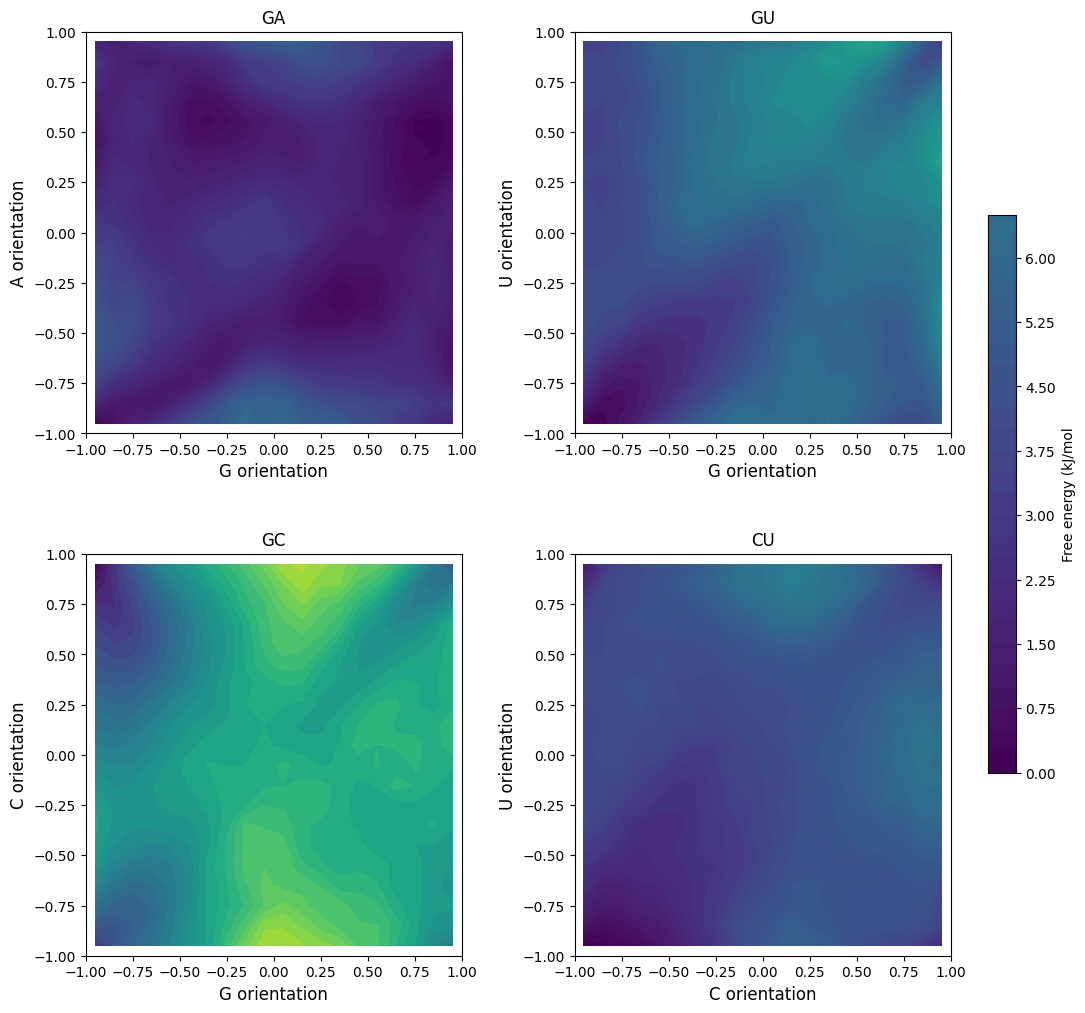

In [303]:
gs = gridspec.GridSpec(2, 2, width_ratios=[0.5, 0.5], height_ratios=[0.5, 0.5])
fig = plt.figure(figsize=(12, 12))
fig.subplots_adjust(wspace=0.3, hspace=0.3)
ax1 = plt.subplot(gs[0, 0])
ax2 = plt.subplot(gs[0, 1])   
ax3 = plt.subplot(gs[1, 0])  
ax4 = plt.subplot(gs[1, 1]) 
axs=[[0,0],[0,1],[1,0],[1,1]]
bases=["GA","GU","GC","CU"]
nucls=["GA","GU","GC","CU"]
contour_plots = []
for i_nucl,nucl in enumerate(nucls):
    data=np.loadtxt("fig_data/orientations/orientation2d_"+str(nucl))
    Z=np.load("fig_data/orientations/orientation2d_Z_"+str(nucl)+".npz")
    Z=np.ma.array(Z['data'], mask=Z['mask'])
    ax=plt.subplot(gs[axs[i_nucl][0],axs[i_nucl][1]])
    CS=ax.contourf(data[:,0], data[:,1], Z.T, 30,vmin=0,vmax=18)
    contour_plots.append(CS)
    ax.set_title(bases[i_nucl])
    ax.set_xlabel(nucl[0] +" orientation",size=12)
    ax.set_ylabel(nucl[1]+ " orientation",size=12)
    ax.set_xlim(right=1,left=-1)
    ax.set_ylim(top=1,bottom=-1)
    ax.set_xticks([-1,-0.75,-0.5,-0.25,0,0.25,0.5,0.75,1])
    ax.set_yticks([-1,-0.75,-0.5,-0.25,0,0.25,0.5,0.75,1])
cbar = fig.colorbar(contour_plots[0], ax=[plt.subplot(gs[i]) for i in range(4)], orientation='vertical', fraction=0.03, pad=0.04)
cbar.set_label("Free energy (kJ/mol")
plt.savefig('fig_data/orientation2d_heterodinucleotides.pdf', transparent=True,bbox_inches='tight')
plt.show()

## Fig. 

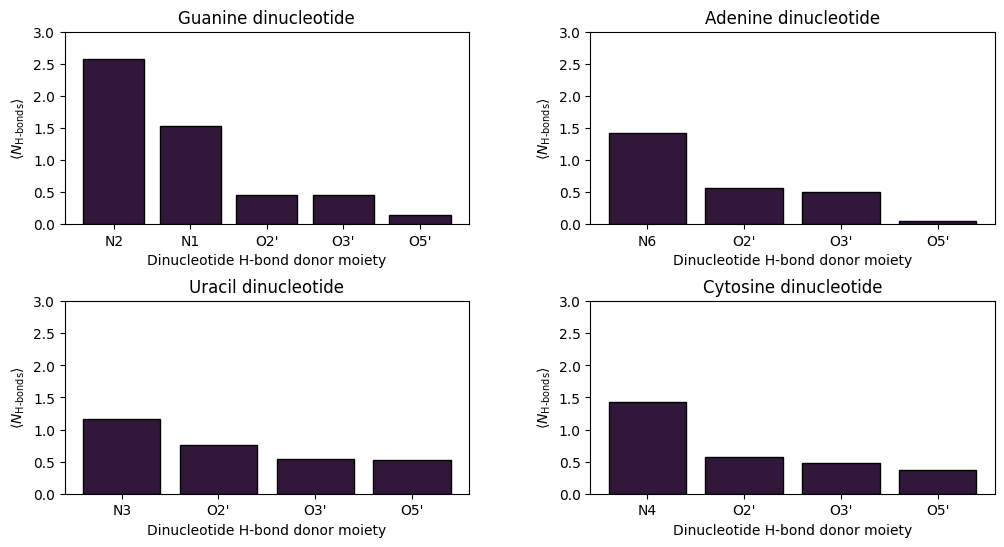

In [168]:
gs = gridspec.GridSpec(2, 2, width_ratios=[0.5, 0.5], height_ratios=[0.5, 0.5])

# Define font size
font_size = 13

# Create the subplots
fig = plt.figure(figsize=(12, 6))
fig.subplots_adjust(wspace=0.3, hspace=0.4)
ax1 = plt.subplot(gs[0, 0])
ax2 = plt.subplot(gs[0, 1])   
ax3 = plt.subplot(gs[1, 0])  
ax4 = plt.subplot(gs[1, 1]) 
axs=[[0,0],[0,1],[1,0],[1,1]]
bases=["Guanine dinucleotide","Adenine dinucleotide","Uracil dinucleotide","Cytosine dinucleotide"]
nucls="G2","A2","U2","C2"
for i_nucl,nucl in enumerate(nucls):
    data=np.genfromtxt("fig_data/contacts/donor_moieties_"+str(nucl),dtype=str)
    ax=plt.subplot(gs[axs[i_nucl][0],axs[i_nucl][1]])
    for i in range(len(data)):
        
        ax.bar(data[i,0],float(data[i,1]),color=palette2_30[3],edgecolor='black')
        ax.set_title(bases[i_nucl])
        ax.set_ylabel(r"$\langle N_{\text{H-bonds}}\rangle$")
        ax.set_xlabel("Dinucleotide H-bond donor moiety")
        ax.set_ylim(top=3)
plt.savefig('fig_data/donormoieties_dinucleotides.pdf', transparent=True,bbox_inches='tight')

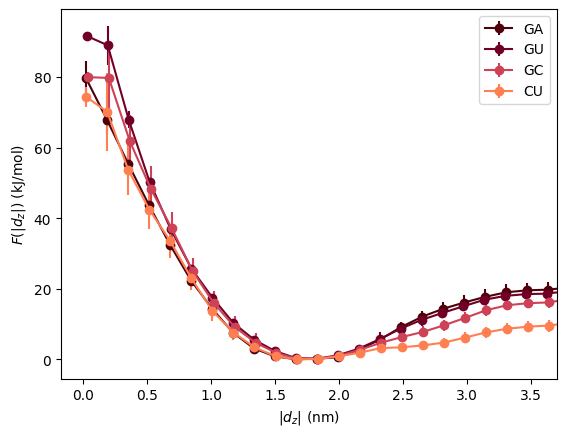

In [296]:
colors=['#4f000b','#720026','#ce4257','#ff7f51']
nucls=["GA","GU","GC","CU"]
for i_nucl,nucl in enumerate(nucls):
    fes_data=np.loadtxt("fig_data/fes/fes_"+str(nucl))
    plt.errorbar(fes_data[::2,0],fes_data[::2,1],fes_data[::2,2],marker='o',label=nucl,color=colors[i_nucl])#,color=palette2[i_nucl])
plt.xlim(right=3.7)
plt.xlabel(r"$|d_z|$ (nm)")
plt.ylabel(r"$F(|d_z|$) (kJ/mol)")
plt.legend()
plt.savefig('fig_data/fes_heterodinucleotides.pdf', transparent=True,bbox_inches='tight')
plt.show()

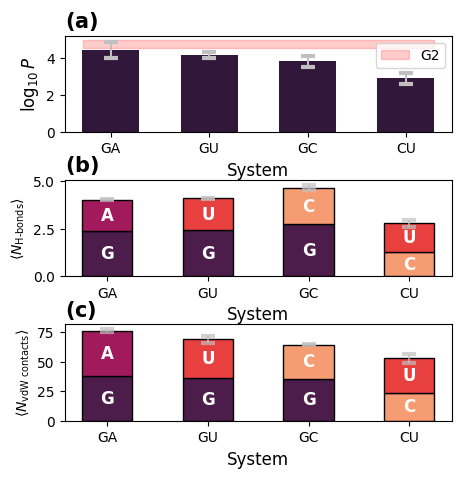

In [336]:
from matplotlib.patches import Rectangle
logPs=np.loadtxt("fig_data/fes/logPs_heterodinuc")
logPs_dinuc=np.loadtxt("fig_data/fes/logPs_all")
fig = plt.figure(figsize=(5, 5))
gs = gridspec.GridSpec(3, 1, width_ratios=[0.5], height_ratios=[0.5,0.5,0.5])
ax1 = plt.subplot(gs[0, 0])
ax2 = plt.subplot(gs[1, 0])   
ax3 = plt.subplot(gs[2, 0]) 
fig.subplots_adjust(wspace=0.6, hspace=0.5)
# Define font size
font_size = 13

# Create the subplots



text_opc=r"$_{\text{OPC}}$"
edgecolors=palette2[0],palette2[0],palette2[0],palette2[3]
colors=palette2[1],palette2[2],palette2[3],palette2[2]
nucls="GA","GU","GC","CU"
width=0.2
bigspacing=0.5
smallspacing=width
start=0
coords=[0]
for i in range(1,8):
    if i%2!=0:
        coords.append(coords[i-1]+smallspacing)
    else:
        coords.append(coords[i-1]+bigspacing)
cG=palette2[0]
cA=palette2[1]
cU=palette2[2]
cC=palette2[3]
colors=[cG,cA,cG,cU,cG,cC,cC,cU]
logps=np.repeat(logPs[:,0],2)
err_logps=logPs[:,1]
ax1.bar(coords,logps,color=palette2_30[3],width=width+0.005)
coords=[coords[0]+width/2,coords[2]+width/2,coords[4]+width/2,coords[6]+width/2]
ax1.set_xticks(coords,["GA","GU","GC","CU"])
ax1.errorbar(coords,logPs[:,0],yerr=err_logps,fmt='none',barsabove=True,capsize=5,capthick=3,c='silver')
ax1.set_xlabel("System",fontsize=12)
ax1.set_ylabel(r"$\log_{10}P$",fontsize=12)
ax1.set_title("$\mathbf{(a)}$",loc='left',fontsize=15)
#ax1.axhline(logPs_dinuc[1,0]-logPs_dinuc[1,1],c='red',ls='dashed')
#ax1.axhline(logPs_dinuc[1,0]+logPs_dinuc[1,1],c='red',ls='dashed')

rect=Rectangle((coords[0]-width,logPs_dinuc[1,0]-logPs_dinuc[1,1]),width=coords[-1]-coords[0]+2*width,height=2*logPs_dinuc[1,1],alpha=0.2,color='red',label='G2')
ax1.add_patch(rect)
ax1.legend()

#2. total hbond contacts

nHB=np.loadtxt("fig_data/contacts/hbonds_bybase_heterodinuc")
hbonds_data=np.loadtxt("fig_data/contacts/tot_hbonds_memb_heterodinuc")
ccouples=[[cG,cA],[cG,cU],[cG,cC],[cC,cU]]
#2. Total hbonds
ax2.errorbar(nucls,hbonds_data[:,0],yerr=hbonds_data[:,1],fmt='none',barsabove=True,capsize=5,capthick=3,c='silver',alpha=0.7)
for i in range(len(nucls)):
    ax2.bar(nucls[i],nHB[i,0],edgecolor='black',ecolor='red',width=0.5,color=ccouples[i][0])
    ax2.text(nucls[i], nHB[i, 0] / 2, nucls[i][0], ha='center', va='center', color='white',fontweight='bold',fontsize=12)

    ax2.bar(nucls[i],nHB[i,2],bottom=nHB[i,0],edgecolor='black',ecolor='red',width=0.5,color=ccouples[i][1])
    ax2.text(nucls[i], nHB[i, 0] + nHB[i, 2] / 2, nucls[i][1], ha='center', va='center', color='white',fontweight='bold',fontsize=12)
ax2.set_ylabel(r"$\langle N_{\text{H-bonds}}\rangle$")
ax2.set_xlabel("System",fontsize=12)
ax2.set_title("$\mathbf{(b)}$",loc='left',fontsize=15)
ax2.set_yticks([0,2.5,5])
#3. Total vdW contacts

nvdw=np.loadtxt("fig_data/contacts/vdws_bybase_heterodinuc")
vdw_data=np.loadtxt("fig_data/contacts/vdw_memb_heterodinuc")
#2. Total hbonds
ax3.errorbar(nucls,vdw_data[:,0],yerr=vdw_data[:,1],fmt='none',barsabove=True,capsize=5,capthick=3,c='silver',alpha=0.7)
for i in range(len(nucls)):
    ax3.bar(nucls[i],nvdw[i,0],edgecolor='black',ecolor='red',width=0.5,color=ccouples[i][0])
    ax3.text(nucls[i], nvdw[i, 0] / 2, nucls[i][0], ha='center', va='center', color='white',fontweight='bold',fontsize=12)

    ax3.bar(nucls[i],nvdw[i,2],bottom=nvdw[i,0],edgecolor='black',ecolor='red',width=0.5,color=ccouples[i][1])
    ax3.text(nucls[i], nvdw[i, 0] + nvdw[i, 2] / 2, nucls[i][1], ha='center', va='center', color='white',fontweight='bold',fontsize=12)
ax3.set_ylabel(r"$\langle N_{\text{vdW contacts}}\rangle$")
ax3.set_xlabel("System",fontsize=12)
ax3.set_title("$\mathbf{(c)}$",loc='left',fontsize=15)
ax3.set_yticks([0,25,50,75])

plt.savefig('fig_data/logP_heterodinuc.pdf', transparent=True,bbox_inches='tight')
plt.show()

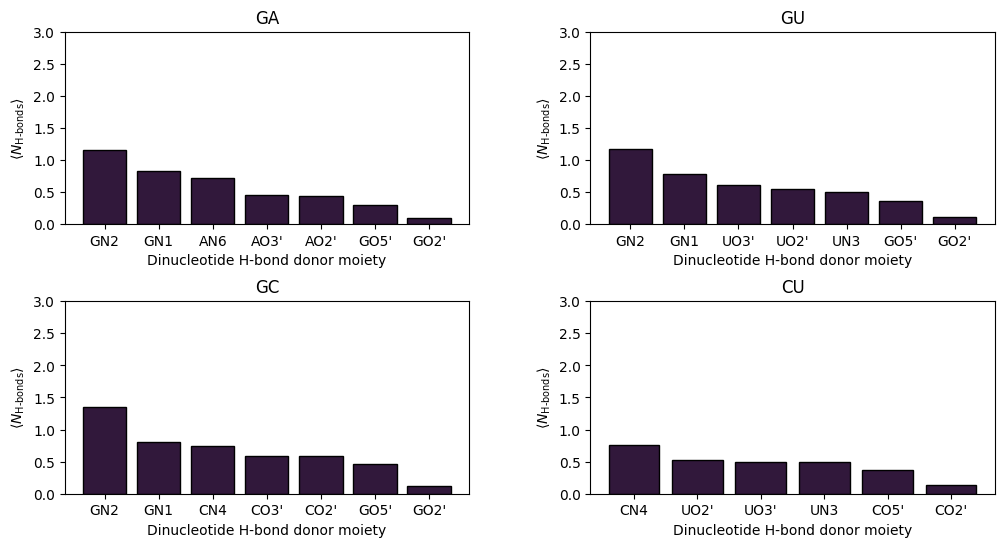

In [341]:
gs = gridspec.GridSpec(2, 2, width_ratios=[0.5, 0.5], height_ratios=[0.5, 0.5])

# Define font size
font_size = 13

# Create the subplots
fig = plt.figure(figsize=(12, 6))
fig.subplots_adjust(wspace=0.3, hspace=0.4)
ax1 = plt.subplot(gs[0, 0])
ax2 = plt.subplot(gs[0, 1])   
ax3 = plt.subplot(gs[1, 0])  
ax4 = plt.subplot(gs[1, 1]) 
axs=[[0,0],[0,1],[1,0],[1,1]]
bases=["GA","GU","GC","CU"]
nucls="GA","GU","GC","CU"
for i_nucl,nucl in enumerate(nucls):
    data=np.genfromtxt("fig_data/contacts/donor_moieties_"+str(nucl),dtype=str)
    ax=plt.subplot(gs[axs[i_nucl][0],axs[i_nucl][1]])
    for i in range(len(data)):
        
        ax.bar(data[i,0],float(data[i,1]),color=palette2_30[3],edgecolor='black')
        ax.set_title(bases[i_nucl])
        ax.set_ylabel(r"$\langle N_{\text{H-bonds}}\rangle$")
        ax.set_xlabel("Dinucleotide H-bond donor moiety")
        ax.set_ylim(top=3)
plt.savefig('fig_data/donormoieties_heterodinucleotides.pdf', transparent=True,bbox_inches='tight')

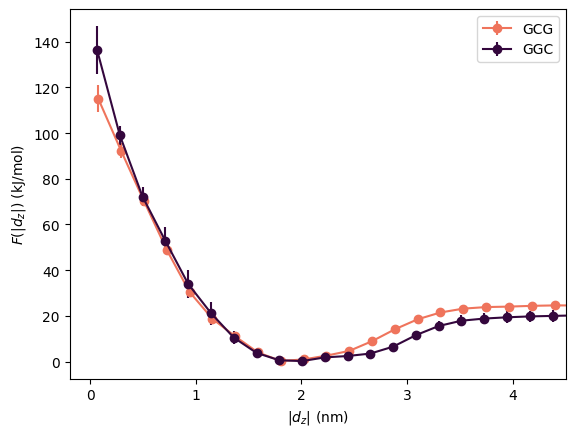

In [299]:
nucls=["GCG","GGC"]
colors=["#ef745c","#34073d"]
for i_nucl,nucl in enumerate(nucls):
    fes_data=np.loadtxt("fig_data/fes/fes_"+str(nucl))
    plt.errorbar(fes_data[::2,0],fes_data[::2,1],fes_data[::2,2],marker='o',label=nucl,color=colors[i_nucl])
plt.xlim(right=4.5)
plt.xlabel(r"$|d_z|$ (nm)")
plt.ylabel(r"$F(|d_z|$) (kJ/mol)")
plt.legend()
plt.savefig('fig_data/fes_heterotrinucleotides.pdf', transparent=True,bbox_inches='tight')
plt.show()

In [79]:
logps

array([4.82583852, 4.82583852, 3.4833128 , 3.4833128 , 4.57480739,
       4.57480739, 3.53686365, 3.53686365])

## Fig. 

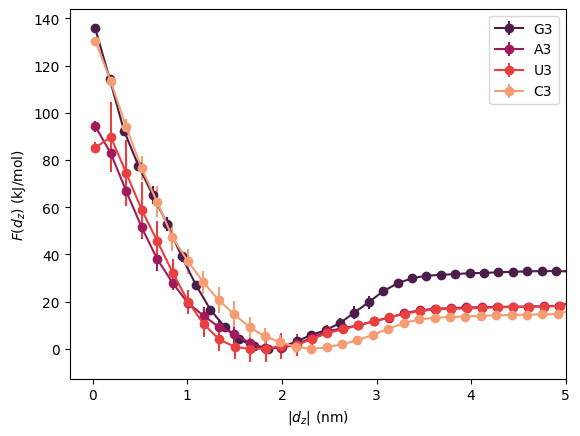

In [15]:
nucls=["G3","A3","U3","C3"]
for i_nucl,nucl in enumerate(nucls):
    fes_data=np.loadtxt("fig_data/fes/fes_"+str(nucl))
    plt.errorbar(fes_data[::3,0],fes_data[::3,1],fes_data[::3,2],marker='o',label=nucl,color=palette2[i_nucl])
plt.xlim(right=5)
plt.xlabel(r"$|d_z|$ (nm)")
plt.ylabel(r"$F(d_z$) (kJ/mol)")
plt.legend()
plt.savefig('fig_data/fes_trinucleotides.pdf', transparent=True,bbox_inches='tight')
plt.show()

## Fig.

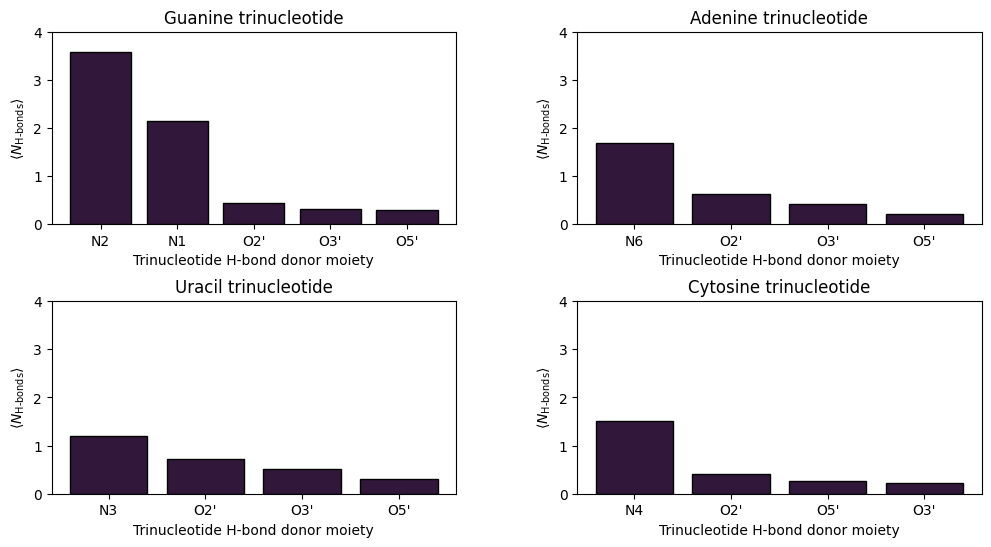

In [342]:
gs = gridspec.GridSpec(2, 2, width_ratios=[0.5, 0.5], height_ratios=[0.5, 0.5])

# Define font size
font_size = 13

# Create the subplots
fig = plt.figure(figsize=(12, 6))
fig.subplots_adjust(wspace=0.3, hspace=0.4)
ax1 = plt.subplot(gs[0, 0])
ax2 = plt.subplot(gs[0, 1])   
ax3 = plt.subplot(gs[1, 0])  
ax4 = plt.subplot(gs[1, 1]) 
axs=[[0,0],[0,1],[1,0],[1,1]]
bases=["Guanine trinucleotide","Adenine trinucleotide","Uracil trinucleotide","Cytosine trinucleotide"]
nucls="G3","A3","U3","C3"
for i_nucl,nucl in enumerate(nucls):
    data=np.genfromtxt("fig_data/contacts/donor_moieties_"+str(nucl),dtype=str)
    ax=plt.subplot(gs[axs[i_nucl][0],axs[i_nucl][1]])
    for i in range(len(data)):
        
        ax.bar(data[i,0],float(data[i,1]),color=palette2_30[3],edgecolor='black')
        ax.set_title(bases[i_nucl])
        ax.set_ylabel(r"$\langle N_{\text{H-bonds}}\rangle$")
        ax.set_xlabel("Trinucleotide H-bond donor moiety")
        ax.set_ylim(top=4)
plt.savefig('fig_data/donormoieties_trinucleotides.pdf', transparent=True,bbox_inches='tight')

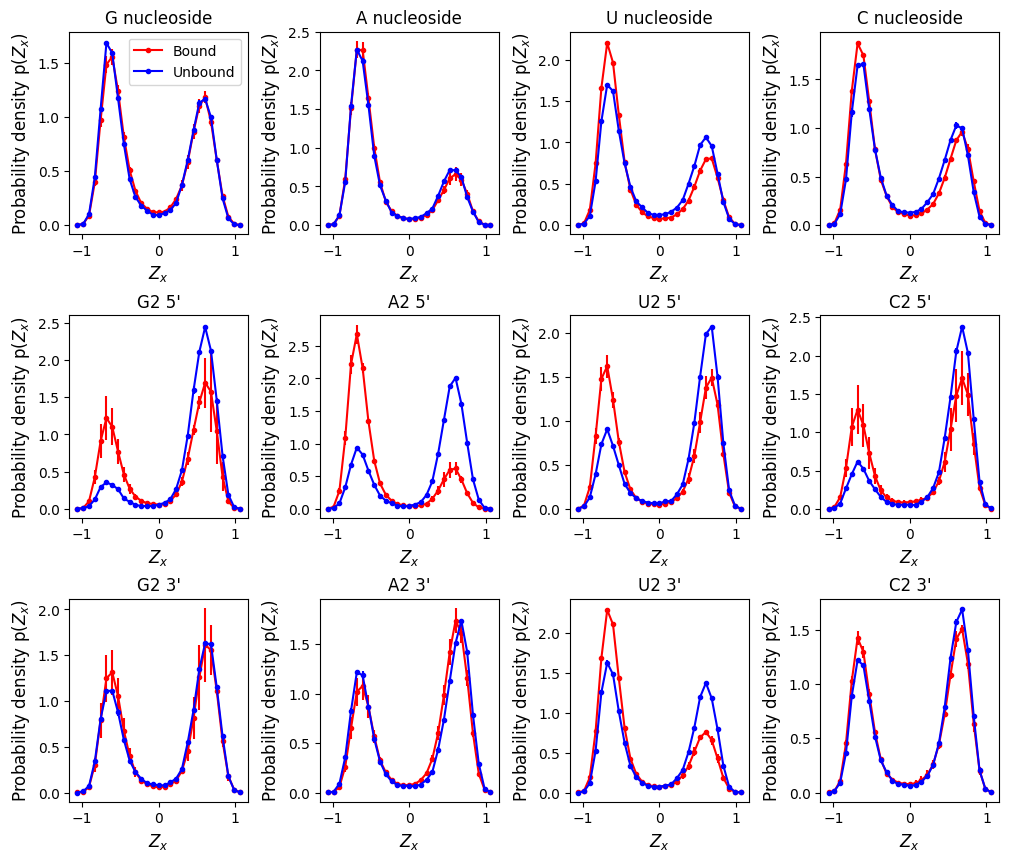

In [100]:
gs = gridspec.GridSpec(3, 4)

# Define font size
font_size = 13

# Create the subplots
fig = plt.figure(figsize=(12, 10))
fig.subplots_adjust(wspace=0.4, hspace=0.4)
ax1 = plt.subplot(gs[0, 0])
ax2 = plt.subplot(gs[0, 1])   
ax3 = plt.subplot(gs[1, 0])  
ax4 = plt.subplot(gs[1, 1]) 
nucls="G","A","U","C"

for i_nucl,nucl in enumerate(nucls):
    data=np.loadtxt("fig_data/orientations/puckers/pucker_"+str(nucl))
    x=data[:,0]
    data=data[:,1:]
    bases=nucl+" nucleoside",nucl+"2 5'",nucl+"2 3'"

    for i_base,base in enumerate(bases):
        ax=plt.subplot(gs[i_base,i_nucl])

        ax.plot(x,data[:,4*i_base],'.-',c='red',label='Bound')
        ax.errorbar(x,data[:,4*i_base],data[:,4*i_base+1],fmt='none',c='red')
        ax.plot(x,data[:,4*i_base+2],'.-',c='blue',label='Unbound')
        ax.errorbar(x,data[:,4*i_base+2],data[:,4*i_base+3],fmt='none',c='blue')
        ax.set_title(base)
        ax.set_xlabel(r"$Z_x$",size=12)
        ax.set_ylabel(r"Probability density p($Z_x$)",size=12)
ax=plt.subplot(gs[0,0])
ax.legend()
plt.savefig('fig_data/pucker_nucleosidesdinucleotides.pdf', transparent=True,bbox_inches='tight')
plt.show()


In [73]:
2%3

2

In [63]:
i_base

0

<Figure size 500x500 with 0 Axes>

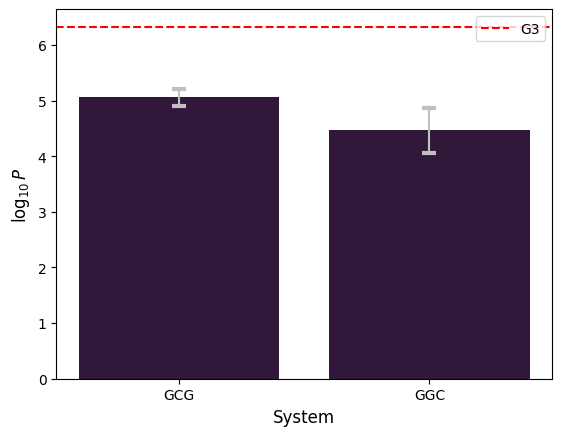

In [313]:
logPs=np.loadtxt("fig_data/fes/logPs_trinuc_GGC")
fig = plt.figure(figsize=(5,5))
fig,ax=plt.subplots()
nucls="GCG","GGC"
width=0.1
bigspacing=0.3
smallspacing=width
coords=[0]
cG=palette2[0]
cA=palette2[1]
cU=palette2[2]
cC=palette2[3]
colors=[cG,cC,cG,cG,cG,cC,cC]
for i in range(1,6):
    if i%3!=0:
        coords.append(coords[i-1]+smallspacing)
    else:
        coords.append(coords[i-1]+bigspacing)
logps=np.repeat(logPs[:,0],3)
err_logps=logPs[:,1]
plt.bar(coords,logps,color=palette2_30[3],width=width+0.1)
coords=[coords[0]+width,coords[3]+width]
ax.errorbar(coords,logPs[:,0],yerr=logPs[:,1],fmt='none',barsabove=True,capsize=5,capthick=3,c='silver')
ax.set_xticks(coords,["GCG","GGC"])
ax.set_xlabel("System",fontsize=12)
plt.ylabel(r"$\log_{10}P$",fontsize=12)
#rect=Rectangle((coords[0]-width,logPs_dinuc[2,0]-logPs_dinuc[2,1]),width=coords[-1]-coords[0]+2*width,height=2*logPs_dinuc[2,1],alpha=0.2,color='red',label='G2')

#ax.add_patch(rect)
ax.axhline(logPs_dinuc[2,0],c='red',ls='dashed',label='G3')
plt.legend()

plt.savefig('fig_data/logP_GGCGCG.pdf', transparent=True,bbox_inches='tight')


plt.show()

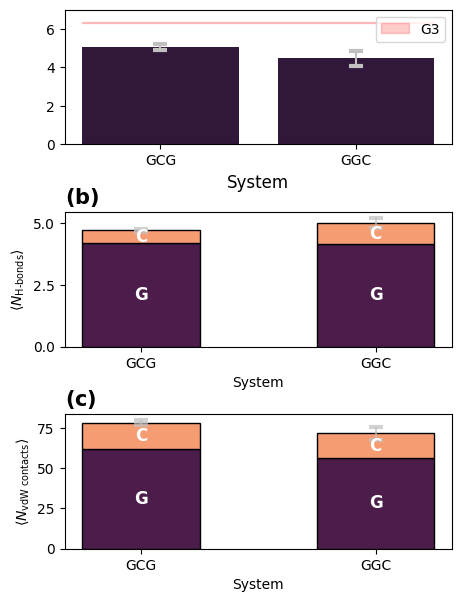

In [344]:
from matplotlib.patches import Rectangle
logPs=np.loadtxt("fig_data/fes/logPs_trinuc_GGC")
logPs_dinuc=np.loadtxt("fig_data/fes/logPs_all")
fig = plt.figure(figsize=(5, 7))
gs = gridspec.GridSpec(3, 1, width_ratios=[0.5], height_ratios=[0.5,0.5,0.5])
ax1 = plt.subplot(gs[0, 0])
ax2 = plt.subplot(gs[1, 0])   
ax3 = plt.subplot(gs[2, 0]) 
fig.subplots_adjust(wspace=0.6, hspace=0.5)
# Define font size
font_size = 13

# Create the subplots



nucls="GCG","GGC"
width=0.1
bigspacing=0.3
smallspacing=width
coords=[0]
cG=palette2[0]
cA=palette2[1]
cU=palette2[2]
cC=palette2[3]
colors=[cG,cC,cG,cG,cG,cC,cC]
for i in range(1,6):
    if i%3!=0:
        coords.append(coords[i-1]+smallspacing)
    else:
        coords.append(coords[i-1]+bigspacing)
logps=np.repeat(logPs[:,0],3)
err_logps=logPs[:,1]
ax1.bar(coords,logps,color=palette2_30[3],width=width+0.1)
coords=[coords[0]+width,coords[3]+width]
ax1.errorbar(coords,logPs[:,0],yerr=logPs[:,1],fmt='none',barsabove=True,capsize=5,capthick=3,c='silver')
ax1.set_xticks(coords,["GCG","GGC"])
ax1.set_xlabel("System",fontsize=12)

rect=Rectangle((coords[0]-width-0.1,logPs_dinuc[2,0]-logPs_dinuc[2,1]),width=coords[-1]-coords[0]+2*(width+0.1),height=2*logPs_dinuc[2,1],alpha=0.2,color='red',label='G3')
ax1.add_patch(rect)
ax1.set_ylim(top=7)
ax1.legend()

#2. total hbond contacts

nHB=np.loadtxt("fig_data/contacts/hbonds_bybase_heterotrinuc")
hbonds_data=np.loadtxt("fig_data/contacts/tot_hbonds_memb_heterotrinuc")
ccouples=[[cG,cC],[cG,cC]]
#2. Total hbonds
ax2.errorbar(nucls,hbonds_data[:,0],yerr=hbonds_data[:,1],fmt='none',barsabove=True,capsize=5,capthick=3,c='silver',alpha=0.7)
for i in range(len(nucls)):
    ax2.bar(nucls[i],nHB[i,0],edgecolor='black',ecolor='red',width=0.5,color=ccouples[i][0])
    ax2.text(nucls[i], nHB[i, 0] / 2, "G", ha='center', va='center', color='white',fontweight='bold',fontsize=12)

    ax2.bar(nucls[i],nHB[i,2],bottom=nHB[i,0],edgecolor='black',ecolor='red',width=0.5,color=ccouples[i][1])
    ax2.text(nucls[i], nHB[i, 0] + nHB[i, 2] / 2, "C", ha='center', va='center', color='white',fontweight='bold',fontsize=12)
ax2.set_ylabel(r"$\langle N_{\text{H-bonds}}\rangle$")
ax2.set_xlabel("System")
ax2.set_title("$\mathbf{(b)}$",loc='left',fontsize=15)
ax2.set_yticks([0,2.5,5])
#3. Total vdW contacts

nvdw=np.loadtxt("fig_data/contacts/vdws_bybase_heterotrinuc")
vdw_data=np.loadtxt("fig_data/contacts/vdw_memb_heterotrinuc")
#2. Total hbonds
ax3.errorbar(nucls,vdw_data[:,0],yerr=vdw_data[:,1],fmt='none',barsabove=True,capsize=5,capthick=3,c='silver',alpha=0.7)
for i in range(len(nucls)):
    ax3.bar(nucls[i],nvdw[i,0],edgecolor='black',ecolor='red',width=0.5,color=ccouples[i][0])
    ax3.text(nucls[i], nvdw[i, 0] / 2, "G", ha='center', va='center', color='white',fontweight='bold',fontsize=12)

    ax3.bar(nucls[i],nvdw[i,2],bottom=nvdw[i,0],edgecolor='black',ecolor='red',width=0.5,color=ccouples[i][1])
    ax3.text(nucls[i], nvdw[i, 0] + nvdw[i, 2] / 2, "C", ha='center', va='center', color='white',fontweight='bold',fontsize=12)
ax3.set_ylabel(r"$\langle N_{\text{vdW contacts}}\rangle$")
ax3.set_xlabel("System")
ax3.set_title("$\mathbf{(c)}$",loc='left',fontsize=15)
ax3.set_yticks([0,25,50,75])

plt.savefig('fig_data/logP_heterotrinuc.pdf', transparent=True,bbox_inches='tight')
plt.show()

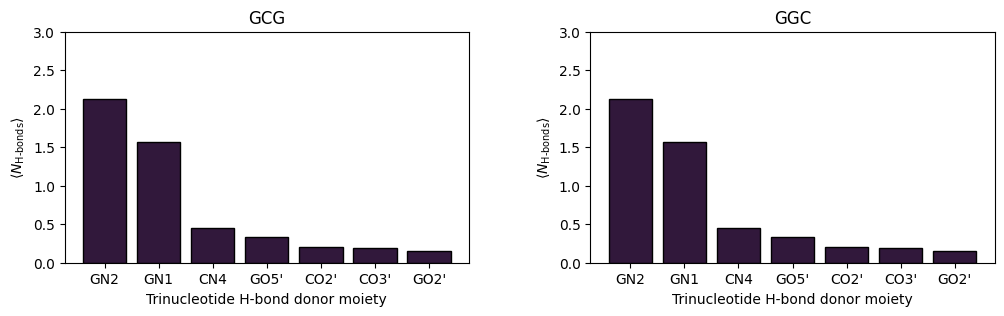

In [349]:
gs = gridspec.GridSpec(1, 2, width_ratios=[0.5, 0.5], height_ratios=[0.5])

# Define font size
font_size = 13

# Create the subplots
fig = plt.figure(figsize=(12, 3))
fig.subplots_adjust(wspace=0.3, hspace=0.4)
ax1 = plt.subplot(gs[0, 0])
ax2 = plt.subplot(gs[0, 1])   
axs=[[0,0],[0,1]]
bases=["GCG","GGC"]
nucls="GGC","GGC"
for i_nucl,nucl in enumerate(nucls):
    data=np.genfromtxt("fig_data/contacts/donor_moieties_"+str(nucl),dtype=str)
    ax=plt.subplot(gs[axs[i_nucl][0],axs[i_nucl][1]])
    for i in range(len(data)):
        
        ax.bar(data[i,0],float(data[i,1]),color=palette2_30[3],edgecolor='black')
        ax.set_title(bases[i_nucl])
        ax.set_ylabel(r"$\langle N_{\text{H-bonds}}\rangle$")
        ax.set_xlabel("Trinucleotide H-bond donor moiety")
        ax.set_ylim(top=3)
plt.savefig('fig_data/donormoieties_heterotrinucleotides.pdf', transparent=True,bbox_inches='tight')

## Fig. 

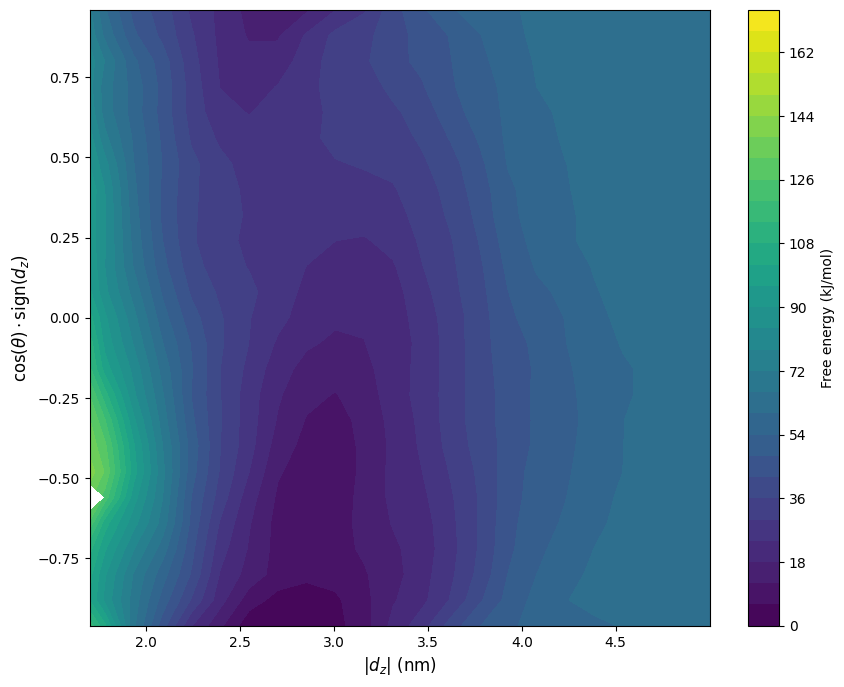

In [17]:
fig = plt.figure(figsize=(10, 8))
data=np.loadtxt("fig_data/fes/fes_quadruplex_2d")
Z=np.load("fig_data/fes/fes_quadruplex_2d_Z.npz")
Z=np.ma.array(Z['data'], mask=Z['mask'])
CS=plt.contourf(data[:,0], data[:,1], Z, 30)
plt.xlabel(r"$|d_z|$ (nm)",size=12)
plt.ylabel(r"$\cos(\theta) \cdot \text{sign}(d_z)$",size=12)
plt.xlim(left=1.7)
cbar = plt.colorbar(CS)
cbar.set_label('Free energy (kJ/mol)')
plt.savefig('fig_data/fes2d_quadruplex.pdf', transparent=True,bbox_inches='tight')
plt.show()

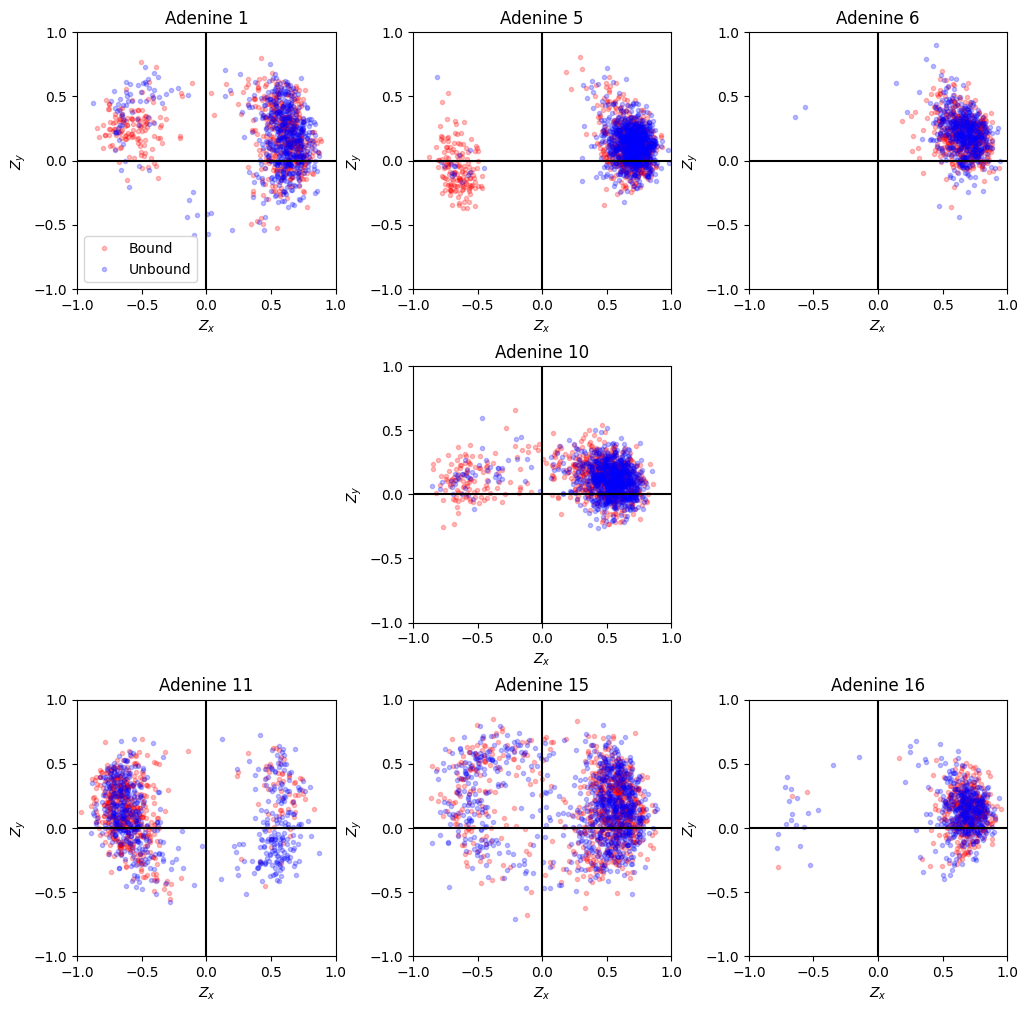

In [30]:

adeno_ids=[0,4,5,9,10,14,15]
gs = gridspec.GridSpec(3, 3)#, width_ratios=[0.5, 0.5,0.5], height_ratios=[0.5, 0.5,0.5])

# Define font size
font_size = 13

# Create the subplots
fig = plt.figure(figsize=(12, 12))
axs=[[0,0],[0,1],[0,2],[1,1],[2,0],[2,1],[2,2]]
fig.subplots_adjust(wspace=0.3, hspace=0.3)

for i_adeno_id,i in enumerate(adeno_ids):
    z_bound=np.loadtxt("fig_data/orientations/puckers/puckerpoints_A"+str(i)+"_bound")
    z_unbound=np.loadtxt("fig_data/orientations/puckers/puckerpoints_A"+str(i)+"_unbound")
    ax=plt.subplot(gs[axs[i_adeno_id][0],axs[i_adeno_id][1]])
    plt.title("Adenine "+str(i+1))
    #circle1 = plt.Circle((0, 0), 1, color='black',fill=False)
    #ax.add_patch(circle1)
    strideb=5
    ax.plot(z_bound[::2,0],z_bound[::2,1],'.',label='Bound',c='red',alpha=0.25)
    ax.plot(z_unbound[::2,0],z_unbound[::2,1],'.',label='Unbound',c='blue',alpha=0.25)
    ax.set_ylim(top=1,bottom=-1)
    ax.set_xlim(right=1,left=-1)
    ax.set_xticks([-1,-0.5,0,0.5,1])
    ax.set_yticks([-1,-0.5,0,0.5,1])
    ax.set_xlabel(r"$Z_x$")
    ax.set_ylabel(r"$Z_y$")
    ax.axhline(0,c='black')
    ax.axvline(0,c='black')    
    #ax.legend()

ax=plt.subplot(gs[0,0])
ax.legend()
plt.savefig('fig_data/pucker_loops_time.pdf', transparent=True,bbox_inches='tight')
#plt.legend(loc='upper left')
plt.show()


In [9]:
len(z_unbound)

838

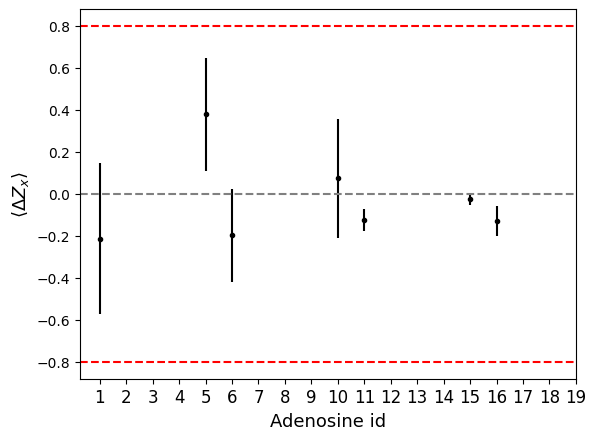

In [31]:
string="AGGGAAGGGAAGGGAAGGG"
diffzx=np.loadtxt("fig_data/orientations/puckerdiffs_quadruplex")
avgs=diffzx[:,0]
errs=diffzx[:,1]
resids=np.array([0,4,5,9,10,14,15])+1


plt.plot(resids,avgs,'.',c='black')
plt.errorbar(resids,avgs,yerr=errs,fmt='none',color='black')

plt.xticks(np.arange(1,20,1),size=12)
plt.xlabel("Adenosine id",size=font_size)
plt.ylabel(r"$\langle \Delta Z_x\rangle$",size=font_size)
plt.axhline(0,linestyle='dashed',c='gray')
plt.axhline(0.8,linestyle='dashed',c='red')
plt.axhline(-0.8,linestyle='dashed',c='red')
plt.savefig('fig_data/delta_zx_puckering.pdf', transparent=True,bbox_inches='tight')
plt.show()

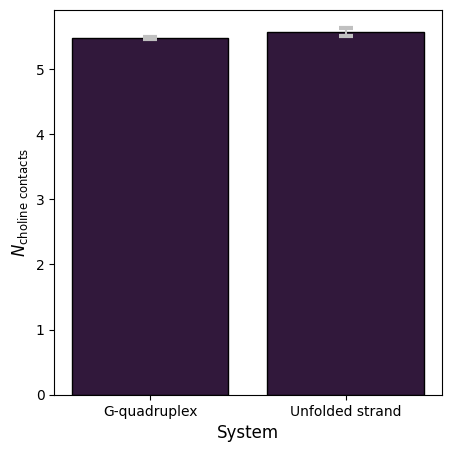

In [197]:
choline_contacts=np.loadtxt("fig_data/contacts/tot_cholines_19mer")
fig = plt.figure(figsize=(5,5))
cholines=choline_contacts[:,0]
nucls="G-quadruplex","Unfolded strand"
err_cholines=choline_contacts[:,1]
plt.bar(nucls,cholines,color=palette2_30[3],edgecolor='black')
plt.errorbar(nucls,cholines,yerr=err_cholines,fmt='none',barsabove=True,capsize=5,capthick=3,c='silver')
plt.xlabel("System",fontsize=12)
plt.ylabel(r"$N_{\text{choline contacts}}$",fontsize=12)
plt.savefig('fig_data/choline_19mer.pdf', transparent=True,bbox_inches='tight')
plt.show()

## Fig.

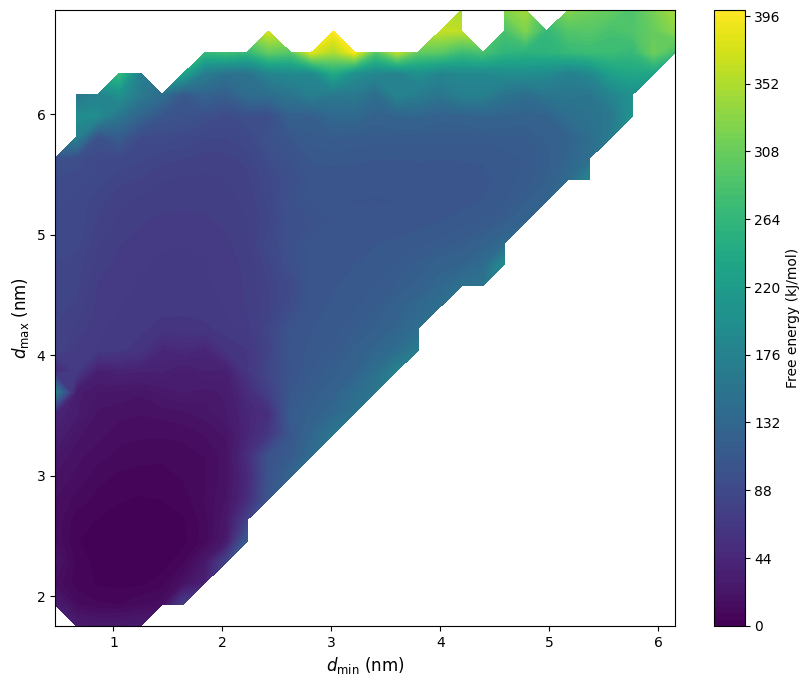

In [18]:
fig = plt.figure(figsize=(10, 8))
data=np.loadtxt("fig_data/fes/fes_strand_2d")
Z=np.load("fig_data/fes/fes_strand_2d_Z.npz")
Z=np.ma.array(Z['data'], mask=Z['mask'])
CS=plt.contourf(data[:,0], data[:,1], Z, 100)
plt.xlabel(r"$d_{\text{min}}$ (nm)",size=12)
plt.ylabel(r"$d_{\text{max}}$ (nm)",size=12)
cbar = plt.colorbar(CS)
cbar.set_label('Free energy (kJ/mol)')
plt.savefig('fig_data/fes2d_strand.pdf', transparent=True,bbox_inches='tight')
plt.show()

# Fig.

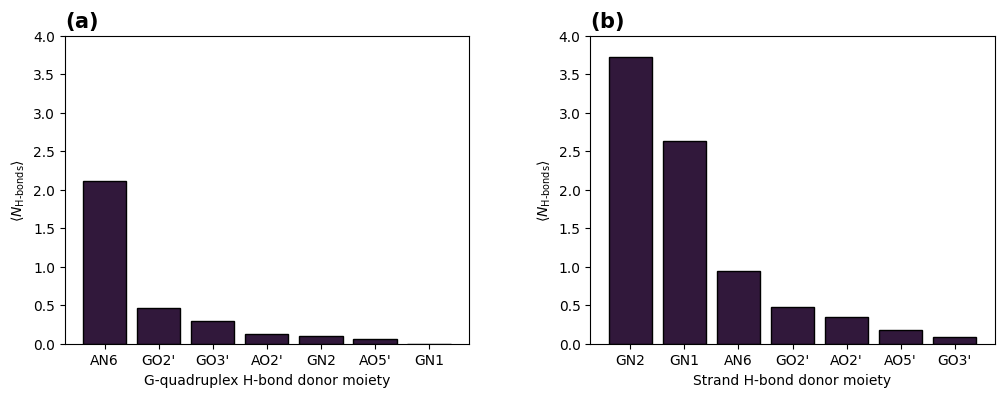

In [171]:
gs = gridspec.GridSpec(1, 2)#, width_ratios=[0.5, 0.5], height_ratios=[0.5, 0.5])

# Define font size
font_size = 13

# Create the subplots
fig = plt.figure(figsize=(12, 4))
fig.subplots_adjust(wspace=0.3, hspace=0.4)
ax1 = plt.subplot(gs[0, 0])
ax2 = plt.subplot(gs[0, 1])   
data=np.genfromtxt("fig_data/contacts/donor_moieties_quadruplex",dtype=str)
for i in range(len(data)):
    ax1.bar(data[i,0],float(data[i,1]),color=palette2_30[3],edgecolor='black')
ax1.set_title("$\mathbf{(a)}$",loc='left',fontsize=15)
ax1.set_ylabel(r"$\langle N_{\text{H-bonds}}\rangle$")
ax1.set_xlabel("G-quadruplex H-bond donor moiety")
ax1.set_ylim(top=4)
data=np.genfromtxt("fig_data/contacts/donor_moieties_strand",dtype=str)
for i in range(len(data)):
    ax2.bar(data[i,0],float(data[i,1]),color=palette2_30[3],edgecolor='black')
ax2.set_ylabel(r"$\langle N_{\text{H-bonds}}\rangle$")
ax2.set_xlabel("Strand H-bond donor moiety")
ax2.set_title("$\mathbf{(b)}$",loc='left',fontsize=15)
ax2.set_ylim(top=4)
plt.savefig('fig_data/quad_strand_hbonds.pdf', transparent=True,bbox_inches='tight')
plt.show()

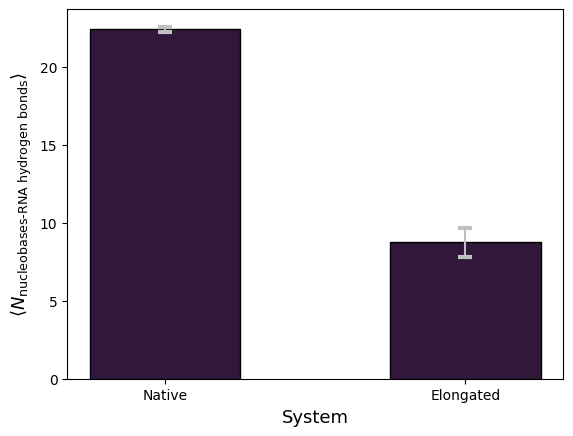

In [52]:
hb_hairpins=np.loadtxt("fig_data/contacts/rnarna_hb_hairpins")
nucls=["Native","Elongated"]
plt.bar(nucls,hb_hairpins[:,0],edgecolor='black',ecolor='red',width=0.5,color=palette2_30[3])
plt.errorbar(nucls,hb_hairpins[:,0],yerr=hb_hairpins[:,1],fmt='none',barsabove=True,capsize=5,capthick=3,c='silver')
plt.ylabel(r"$\langle N_{\text{nucleobases-RNA hydrogen bonds}}\rangle$",size=font_size)
plt.xlabel("System",size=font_size)

plt.savefig('fig_data/nucleobase-rnahbonds_hairpins.pdf', transparent=True,bbox_inches='tight')
plt.show()


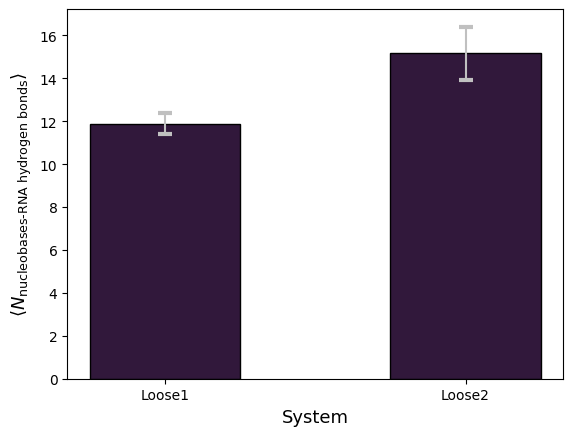

In [54]:
hb_hairpins=np.loadtxt("fig_data/contacts/rnarna_hb_loose12")
nucls=["Loose1","Loose2"]
plt.bar(nucls,hb_hairpins[:,0],edgecolor='black',ecolor='red',width=0.5,color=palette2_30[3])
plt.errorbar(nucls,hb_hairpins[:,0],yerr=hb_hairpins[:,1],fmt='none',barsabove=True,capsize=5,capthick=3,c='silver')
plt.ylabel(r"$\langle N_{\text{nucleobases-RNA hydrogen bonds}}\rangle$",size=font_size)
plt.xlabel("System",size=font_size)

plt.savefig('fig_data/nucleobase-rnahbonds_loose12.pdf', transparent=True,bbox_inches='tight')
plt.show()


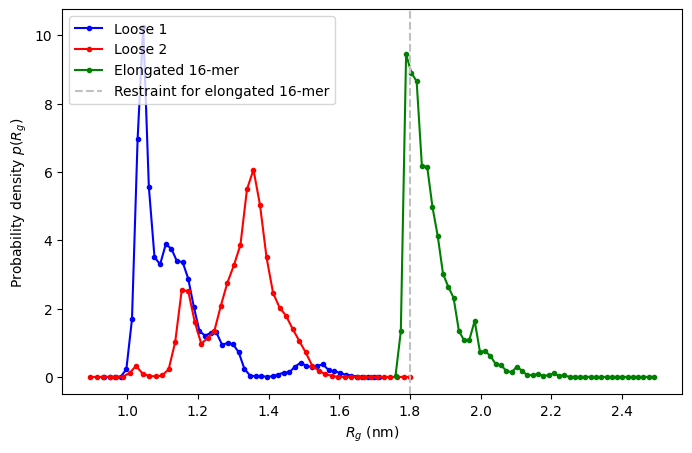

In [45]:
fig = plt.figure(figsize=(8, 5))
nucls="ensemble1","ensemble2","elongated"
labels=["Loose 1","Loose 2","Elongated 16-mer"]
colors=["blue","red","green"]
for i_nucl,nucl in enumerate(nucls):
    data=np.loadtxt("fig_data/orientations/hist_rg_"+nucl+".dat")
    plt.plot(data[:,0],data[:,1],'.-',c=colors[i_nucl],label=labels[i_nucl])
plt.axvline(1.8,c='silver',ls='dashed',label='Restraint for elongated 16-mer')
plt.xlabel(r"$R_g$ (nm)")
plt.ylabel(r"Probability density $p(R_g)$")

plt.legend()
plt.savefig('fig_data/gyrradius_16mer.pdf', transparent=True,bbox_inches='tight')
plt.show()

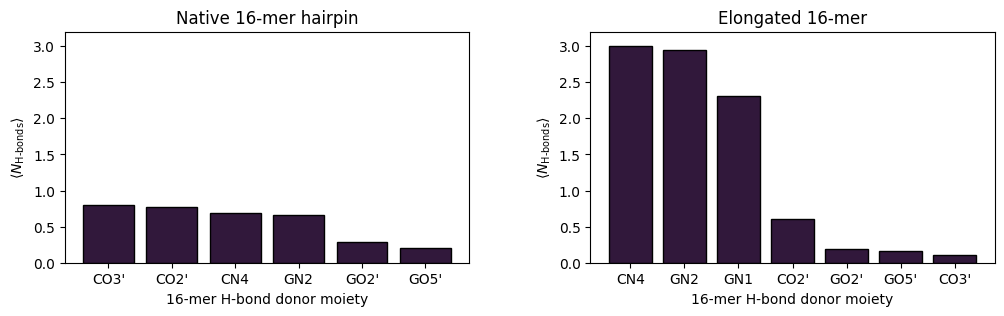

In [51]:
gs = gridspec.GridSpec(1, 2)

# Define font size
font_size = 13

# Create the subplots
fig = plt.figure(figsize=(12, 3))
fig.subplots_adjust(wspace=0.3, hspace=0.7)
ax1 = plt.subplot(gs[0, 0])
ax2 = plt.subplot(gs[0, 1])
axs=[[0,0],[0,1]]
bases=["Native 16-mer hairpin","Elongated 16-mer"]
nucls="hairpin","hairpin_elongated"
for i_nucl,nucl in enumerate(nucls):
    data=np.genfromtxt("fig_data/contacts/donor_moieties_"+str(nucl),dtype=str)
    ax=plt.subplot(gs[axs[i_nucl][0],axs[i_nucl][1]])
    for i in range(len(data)):
        
        ax.bar(data[i,0],float(data[i,1]),color=palette2_30[3],edgecolor='black')
        ax.set_title(bases[i_nucl])
        ax.set_ylabel(r"$\langle N_{\text{H-bonds}}\rangle$")
        ax.set_xlabel("16-mer H-bond donor moiety")
        ax.set_ylim(top=3.2)
plt.savefig('fig_data/donormoieties_hairpins.pdf', transparent=True,bbox_inches='tight')

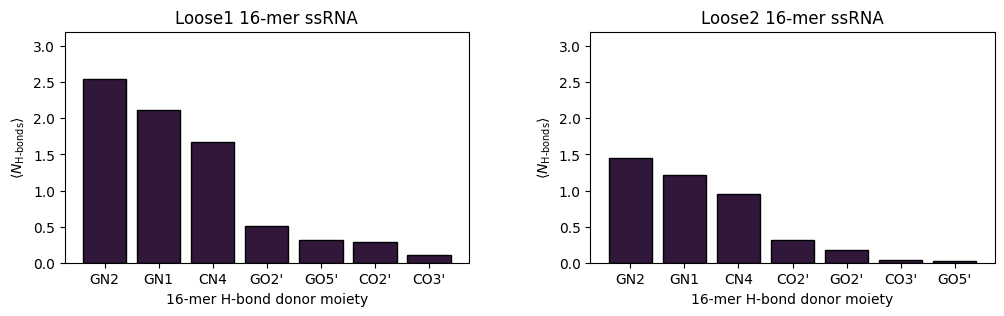

In [53]:
gs = gridspec.GridSpec(1, 2)

# Define font size
font_size = 13

# Create the subplots
fig = plt.figure(figsize=(12, 3))
fig.subplots_adjust(wspace=0.3, hspace=0.7)
ax1 = plt.subplot(gs[0, 0])
ax2 = plt.subplot(gs[0, 1])
axs=[[0,0],[0,1]]
bases=["Loose1 16-mer ssRNA","Loose2 16-mer ssRNA"]
nucls="hairpin_loose1","hairpin_loose2"
for i_nucl,nucl in enumerate(nucls):
    data=np.genfromtxt("fig_data/contacts/donor_moieties_"+str(nucl),dtype=str)
    ax=plt.subplot(gs[axs[i_nucl][0],axs[i_nucl][1]])
    for i in range(len(data)):
        
        ax.bar(data[i,0],float(data[i,1]),color=palette2_30[3],edgecolor='black')
        ax.set_title(bases[i_nucl])
        ax.set_ylabel(r"$\langle N_{\text{H-bonds}}\rangle$")
        ax.set_xlabel("16-mer H-bond donor moiety")
        ax.set_ylim(top=3.2)
plt.savefig('fig_data/donormoieties_hairpins_loose.pdf', transparent=True,bbox_inches='tight')

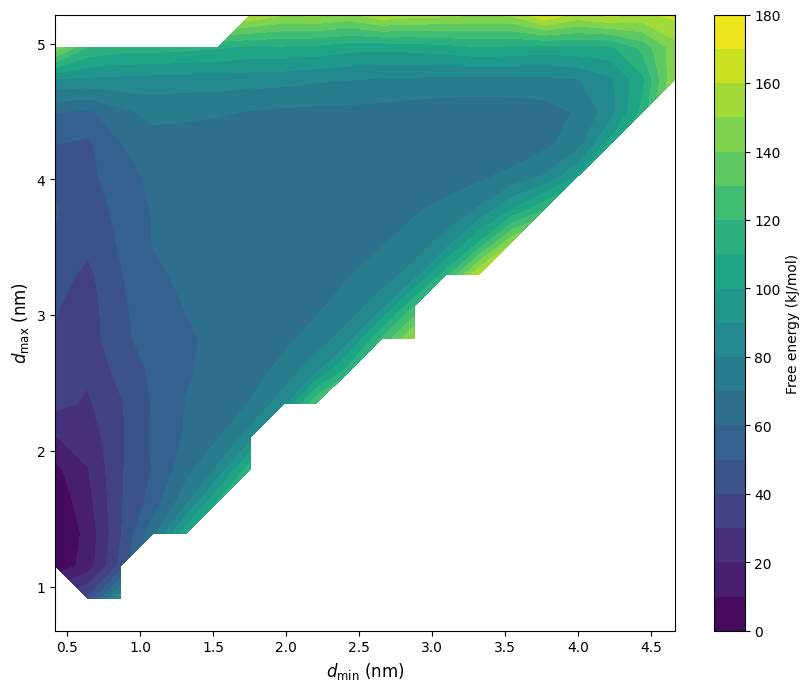

In [3]:
fig = plt.figure(figsize=(10, 8))
data=np.loadtxt("fig_data/fes/fes_hairpin_loose_2d")
Z=np.load("fig_data/fes/fes_hairpin_loose_2d_Z.npz")
Z=np.ma.array(Z['data'], mask=Z['mask'])
CS=plt.contourf(data[:,0], data[:,1], Z, 20)
plt.xlabel(r"$d_{\text{min}}$ (nm)",size=12)
plt.ylabel(r"$d_{\text{max}}$ (nm)",size=12)
cbar = plt.colorbar(CS)
cbar.set_label('Free energy (kJ/mol)')
plt.savefig('fig_data/fes2d_hairpin_loose.pdf', transparent=True,bbox_inches='tight')
plt.show()

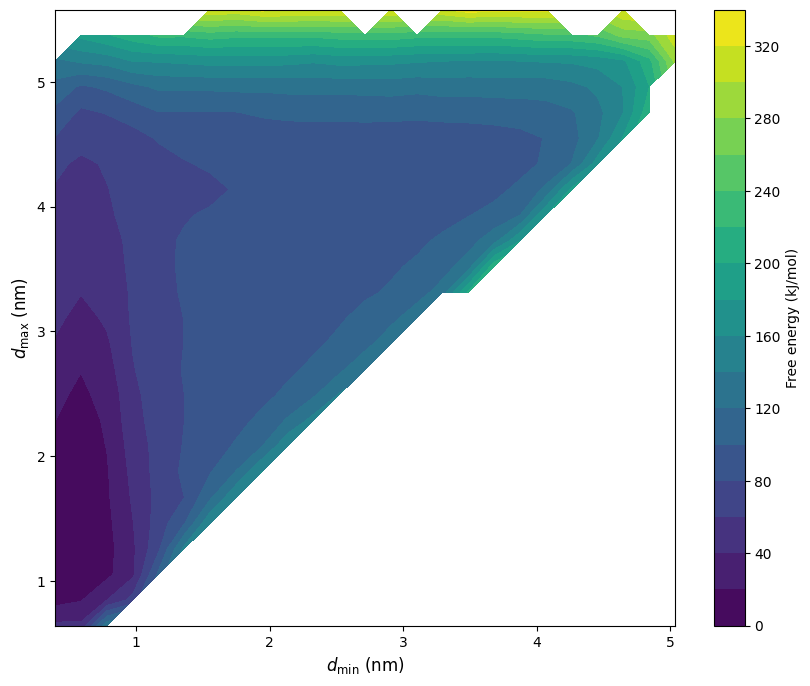

In [4]:
fig = plt.figure(figsize=(10, 8))
data=np.loadtxt("fig_data/fes/fes_hairpin_elong_2d")
Z=np.load("fig_data/fes/fes_hairpin_elong_2d_Z.npz")
Z=np.ma.array(Z['data'], mask=Z['mask'])
CS=plt.contourf(data[:,0], data[:,1], Z, 20)
plt.xlabel(r"$d_{\text{min}}$ (nm)",size=12)
plt.ylabel(r"$d_{\text{max}}$ (nm)",size=12)
cbar = plt.colorbar(CS)
cbar.set_label('Free energy (kJ/mol)')
plt.savefig('fig_data/fes2d_hairpin_elong.pdf', transparent=True,bbox_inches='tight')
plt.show()

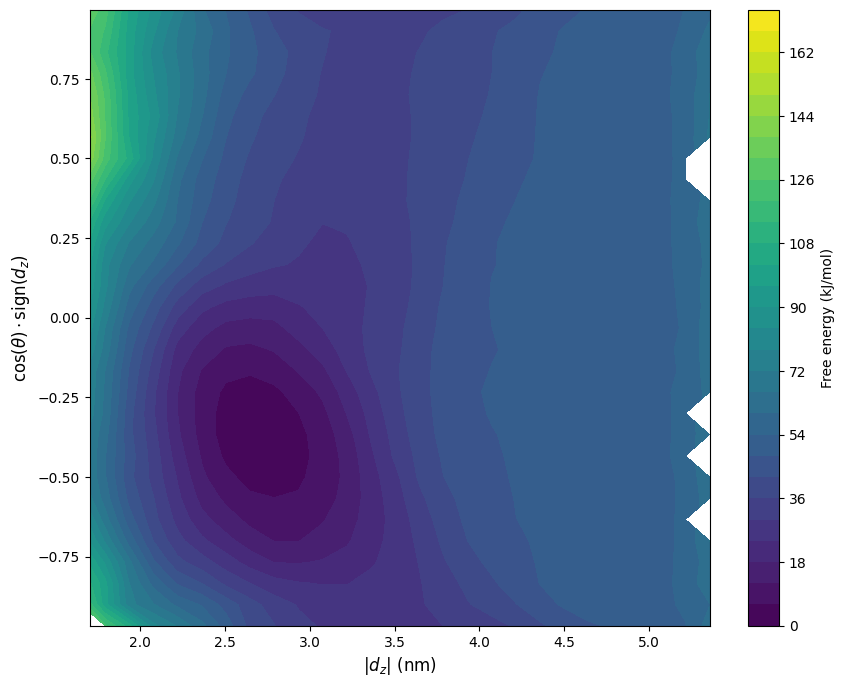

In [300]:
fig = plt.figure(figsize=(10, 8))
data=np.loadtxt("fig_data/fes/fes_hairpin_2d")
Z=np.load("fig_data/fes/fes_hairpin_2d_Z.npz")
Z=np.ma.array(Z['data'], mask=Z['mask'])
CS=plt.contourf(data[:,0], data[:,1], Z, 30)
plt.xlabel(r"$|d_z|$ (nm)",size=12)
plt.ylabel(r"$\cos(\theta) \cdot \text{sign}(d_z)$",size=12)
plt.xlim(left=1.7)
cbar = plt.colorbar(CS)
cbar.set_label('Free energy (kJ/mol)')
plt.savefig('fig_data/fes2d_hairpin.pdf', transparent=True,bbox_inches='tight')
plt.show()

## Fig.

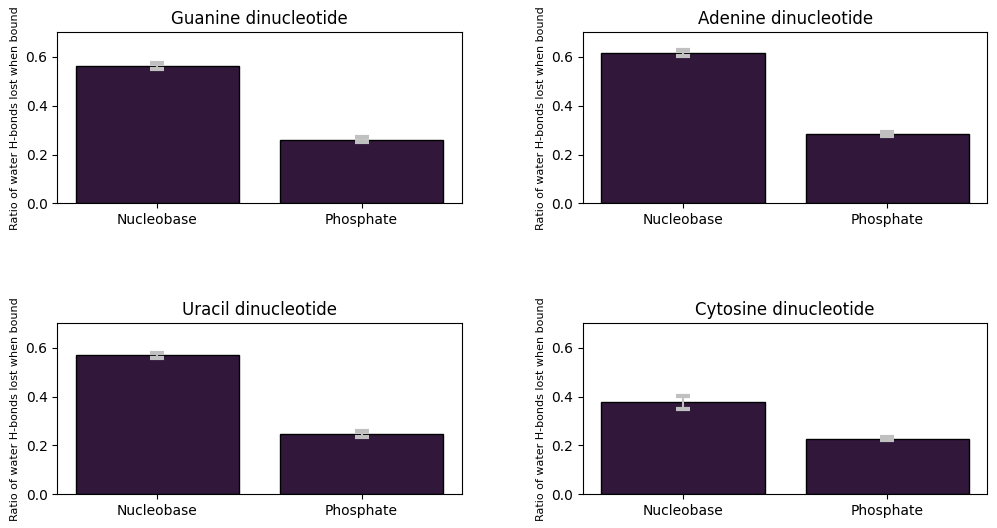

In [176]:
gs = gridspec.GridSpec(2, 2, width_ratios=[0.5, 0.5], height_ratios=[0.5, 0.5])

# Define font size
font_size = 13

# Create the subplots
fig = plt.figure(figsize=(12, 6))
fig.subplots_adjust(wspace=0.3, hspace=0.7)
ax1 = plt.subplot(gs[0, 0])
ax2 = plt.subplot(gs[0, 1])   
ax3 = plt.subplot(gs[1, 0])  
ax4 = plt.subplot(gs[1, 1]) 
axs=[[0,0],[0,1],[1,0],[1,1]]
bases=["Guanine dinucleotide","Adenine dinucleotide","Uracil dinucleotide","Cytosine dinucleotide"]
data_base=np.genfromtxt("fig_data/contacts/basediffs_dinucleotides",dtype=float)
data_phosph=np.genfromtxt("fig_data/contacts/phosphdiffs_dinucleotides",dtype=float)
nucls="G2","A2","U2","C2"
for i_nucl,nucl in enumerate(nucls):

    ax=plt.subplot(gs[axs[i_nucl][0],axs[i_nucl][1]])
    ax.bar("Nucleobase",data_base[i_nucl,0],color=palette2_30[3],edgecolor='black')
    ax.errorbar("Nucleobase",data_base[i_nucl,0],yerr=float(data_base[i_nucl,1]),fmt='none',barsabove=True,capsize=5,capthick=3,c='silver')
    ax.bar("Phosphate",data_phosph[i_nucl,0],color=palette2_30[3],edgecolor='black')
    ax.errorbar("Phosphate",data_phosph[i_nucl,0],yerr=data_phosph[i_nucl,1],fmt='none',barsabove=True,capsize=5,capthick=3,c='silver')
    ax.set_title(bases[i_nucl])
    ax.set_ylabel("Ratio of water H-bonds lost when bound",fontsize=8)
    ax.set_ylim(top=0.7)
plt.savefig('fig_data/diffs_dinucleotides.pdf', transparent=True,bbox_inches='tight')

## Fig.

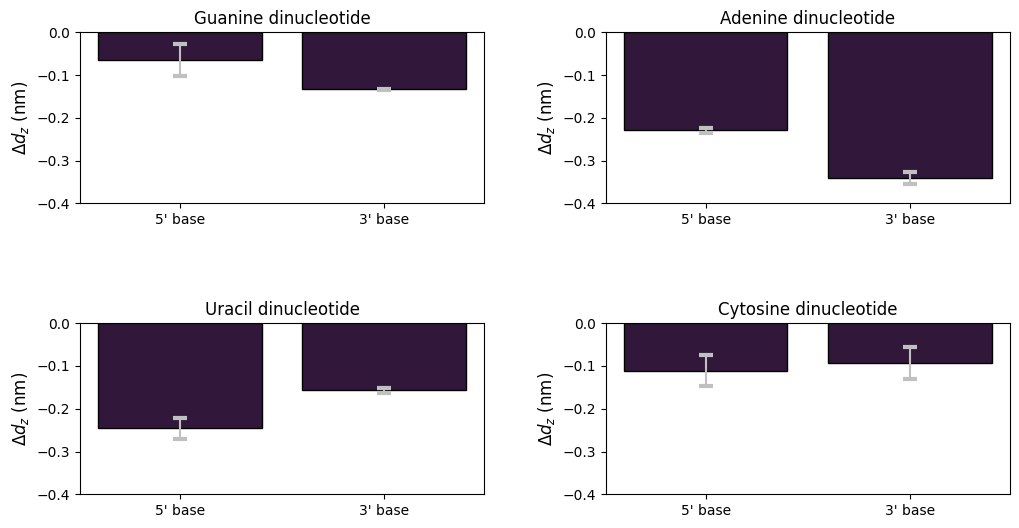

In [177]:
gs = gridspec.GridSpec(2, 2, width_ratios=[0.5, 0.5], height_ratios=[0.5, 0.5])

# Define font size
font_size = 13

# Create the subplots
fig = plt.figure(figsize=(12, 6))
fig.subplots_adjust(wspace=0.3, hspace=0.7)
ax1 = plt.subplot(gs[0, 0])
ax2 = plt.subplot(gs[0, 1])   
ax3 = plt.subplot(gs[1, 0])  
ax4 = plt.subplot(gs[1, 1]) 
axs=[[0,0],[0,1],[1,0],[1,1]]
bases=["Guanine dinucleotide","Adenine dinucleotide","Uracil dinucleotide","Cytosine dinucleotide"]
nucls="G2","A2","U2","C2"
for i_nucl,nucl in enumerate(nucls):
    data_base=np.genfromtxt("fig_data/contacts/phosphdzdist_"+nucl,dtype=float)
    ax=plt.subplot(gs[axs[i_nucl][0],axs[i_nucl][1]])
    ax.bar("5' base",data_base[0,0],color=palette2_30[3],edgecolor='black')
    ax.errorbar("5' base",data_base[0,0],yerr=data_base[0,1],barsabove=True,capsize=5,capthick=3,c='silver')
    ax.bar("3' base",data_base[1,0],color=palette2_30[3],edgecolor='black')
    ax.errorbar("3' base",data_base[1,0],yerr=data_base[1,1],barsabove=True,capsize=5,capthick=3,c='silver')
    ax.set_title(bases[i_nucl])
    ax.set_ylabel(r"$\Delta d_z$ (nm)",fontsize=12)
    ax.set_ylim(bottom=-0.4)
plt.savefig('fig_data/zdistdiffs_dinucleotides.pdf', transparent=True,bbox_inches='tight')

## Fig.

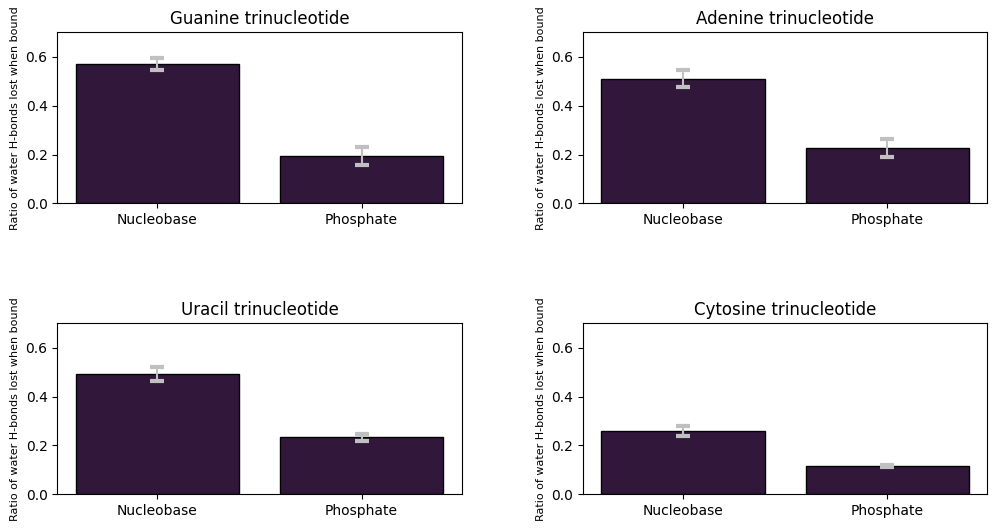

In [ ]:
gs = gridspec.GridSpec(2, 2, width_ratios=[0.5, 0.5], height_ratios=[0.5, 0.5])

# Define font size
font_size = 13

# Create the subplots
fig = plt.figure(figsize=(12, 6))
fig.subplots_adjust(wspace=0.3, hspace=0.7)
ax1 = plt.subplot(gs[0, 0])
ax2 = plt.subplot(gs[0, 1])   
ax3 = plt.subplot(gs[1, 0])  
ax4 = plt.subplot(gs[1, 1]) 
axs=[[0,0],[0,1],[1,0],[1,1]]
bases=["Guanine trinucleotide","Adenine trinucleotide","Uracil trinucleotide","Cytosine trinucleotide"]
data_base=np.genfromtxt("fig_data/contacts/basediffs_trinucleotides",dtype=float)
data_phosph=np.genfromtxt("fig_data/contacts/phosphdiffs_trinucleotides",dtype=float)
nucls="G3","A3","U3","C3"
for i_nucl,nucl in enumerate(nucls):

    ax=plt.subplot(gs[axs[i_nucl][0],axs[i_nucl][1]])
    ax.bar("Nucleobase",data_base[i_nucl,0],color=palette2_30[3],edgecolor='black')
    ax.errorbar("Nucleobase",data_base[i_nucl,0],yerr=float(data_base[i_nucl,1]),barsabove=True,capsize=5,capthick=3,c='silver')
    ax.bar("Phosphate",data_phosph[i_nucl,0],color=palette2_30[3],edgecolor='black')
    ax.errorbar("Phosphate",data_phosph[i_nucl,0],yerr=data_phosph[i_nucl,1],barsabove=True,capsize=5,capthick=3,c='silver')
    ax.set_title(bases[i_nucl])
    ax.set_ylabel("Ratio of water H-bonds lost when bound",fontsize=8)
    ax.set_ylim(top=0.7)
plt.savefig('fig_data/diffs_trinucleotides.pdf', transparent=True,bbox_inches='tight')

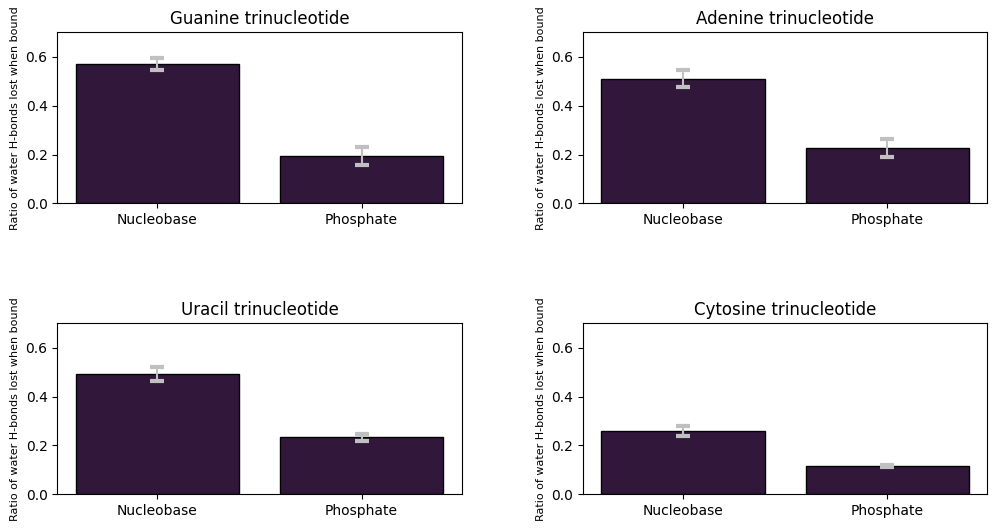

In [179]:
gs = gridspec.GridSpec(2, 2, width_ratios=[0.5, 0.5], height_ratios=[0.5, 0.5])

# Define font size
font_size = 13

# Create the subplots
fig = plt.figure(figsize=(12, 6))
fig.subplots_adjust(wspace=0.3, hspace=0.7)
ax1 = plt.subplot(gs[0, 0])
ax2 = plt.subplot(gs[0, 1])   
ax3 = plt.subplot(gs[1, 0])  
ax4 = plt.subplot(gs[1, 1]) 
axs=[[0,0],[0,1],[1,0],[1,1]]
bases=["Guanine trinucleotide","Adenine trinucleotide","Uracil trinucleotide","Cytosine trinucleotide"]
data_base=np.genfromtxt("fig_data/contacts/basediffs_trinucleotides",dtype=float)
data_phosph=np.genfromtxt("fig_data/contacts/phosphdiffs_trinucleotides",dtype=float)
nucls="G3","A3","U3","C3"
for i_nucl,nucl in enumerate(nucls):

    ax=plt.subplot(gs[axs[i_nucl][0],axs[i_nucl][1]])
    ax.bar("Nucleobase",data_base[i_nucl,0],color=palette2_30[3],edgecolor='black')
    ax.errorbar("Nucleobase",data_base[i_nucl,0],yerr=float(data_base[i_nucl,1]),barsabove=True,capsize=5,capthick=3,c='silver')
    ax.bar("Phosphate",data_phosph[i_nucl,0],color=palette2_30[3],edgecolor='black')
    ax.errorbar("Phosphate",data_phosph[i_nucl,0],yerr=data_phosph[i_nucl,1],barsabove=True,capsize=5,capthick=3,c='silver')
    ax.set_title(bases[i_nucl])
    ax.set_ylabel("Ratio of water H-bonds lost when bound",fontsize=8)
    ax.set_ylim(top=0.7)
plt.savefig('fig_data/diffs_trinucleotides.pdf', transparent=True,bbox_inches='tight')